__Описание проекта:__

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

__Цель проекта:__
    
1) Необходимо  промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень»;

2) Необходимо собрать данные по клиентам по следующим группам:

- Признаки, которые описывают коммуникацию сотрудников компании с клиентом;

- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто;

- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине;

- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3) Необходимо построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;

4) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;

5) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

__Описание данных:__

_market_file.csv_ - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных;

- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»;

- Тип сервиса — уровень сервиса, например «премиум» и «стандарт»;

- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;

- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;

- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце;

- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;

- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;

- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев;

- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;

- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца;

- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта;

- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

_market_money.csv_ - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных;

- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц';

- Выручка — сумма выручки за период.

_market_time.csv_ - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных;

- Период — название периода, во время которого зафиксировано общее время;

- минут — значение времени, проведённого на сайте, в минутах.

_money.csv_ - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных;

- Прибыль — значение прибыли.

__План выполнения работ:__

1) Загрузка данных;

2) Предобработка данных;

3) Исследовательский анализ данных;

4) Объединение таблиц;

5) Корреляционный анализ;

6) Использование пайплайнов;

7) Анализ важности признаков;

8) Сегментация покупателей;

9) Общий вывод.

# 1.  Загрузка данных

__План работ:__

1) Загрузить четыре датафрейма;

2) Проверить, что данные в таблицах соотвествуют описанию.

In [1]:
!pip install phik -q

In [2]:
!pip install shap -q

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.datasets import make_classification
import shap
import phik

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [4]:
!pip install scikit-learn==1.1.3 -q

In [5]:
market_file = pd.read_csv('C:\my_python_projects\Командная строка - Git\market_file.csv')
market_file.head(3)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


In [6]:
market_money = pd.read_csv('C:\my_python_projects\Командная строка - Git\market_money.csv')
market_money.head(3)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [7]:
market_time = pd.read_csv('C:\my_python_projects\Командная строка - Git\market_time.csv')
market_time.head(3)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


In [8]:
money = pd.read_csv('C:\my_python_projects\Командная строка - Git\money.csv', sep=';', decimal = ',')
money.head(3)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


__Вывод:__

1) Загружены четыре датафрейма;

2) Данные в таблицах соотвествуют описанию.

# 2.  Предобработка данных

__План работ:__

1. Проверить данные на наличие пропусков и дубликатов;

2. Проверить тип данных у каждого признака;

3. При необходимости устранить проблемы с данными.

In [9]:
# Изучим и исправим проблемы с данными в датафреме market_file.csv

In [10]:
market_file.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [11]:
market_file['Покупательская активность'] = market_file['Покупательская активность'].str.lower()
market_file['Покупательская активность'].unique()

array(['снизилась', 'прежний уровень'], dtype=object)

In [12]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [13]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт','стандарт')
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [14]:
market_file['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [15]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [16]:
market_file.duplicated().sum()

0

In [17]:
market_file.isnull().sum() 

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [18]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Визуализация числевых данных датафрейма


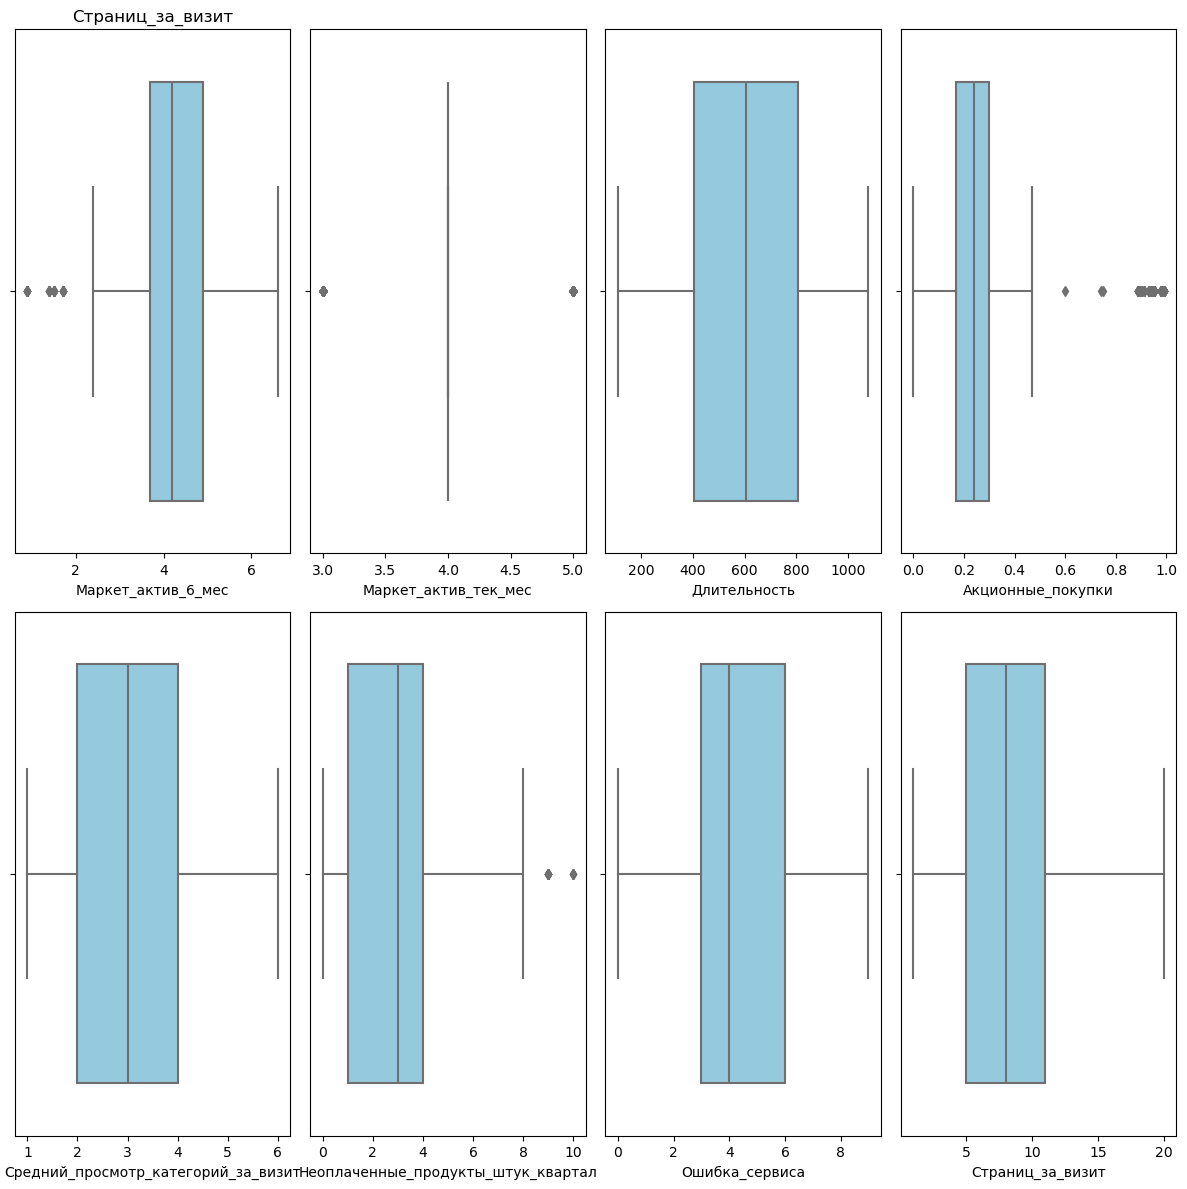

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12))

sns.boxplot(data=market_file, x="Маркет_актив_6_мес", color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title("Маркет_актив_6_мес")
sns.boxplot(data=market_file, x="Маркет_актив_тек_мес", color="skyblue", ax=axs[0, 1])
axs[0, 0].set_title("Маркет_актив_тек_мес")
sns.boxplot(data=market_file, x="Длительность", color="skyblue", ax=axs[0, 2])
axs[0, 0].set_title("Длительность")
sns.boxplot(data=market_file, x="Акционные_покупки", color="skyblue", ax=axs[0, 3])
axs[0, 0].set_title("Акционные_покупки")
sns.boxplot(data=market_file, x="Средний_просмотр_категорий_за_визит", color="skyblue", ax=axs[1, 0])
axs[0, 0].set_title("Средний_просмотр_категорий_за_визит")
sns.boxplot(data=market_file, x="Неоплаченные_продукты_штук_квартал", color="skyblue", ax=axs[1, 1])
axs[0, 0].set_title("Неоплаченные_продукты_штук_квартал")
sns.boxplot(data=market_file, x="Ошибка_сервиса", color="skyblue", ax=axs[1, 2])
axs[0, 0].set_title("Ошибка_сервиса")
sns.boxplot(data=market_file, x="Страниц_за_визит", color="skyblue", ax=axs[1, 3])
axs[0, 0].set_title("Страниц_за_визит")

print('Визуализация числевых данных датафрейма')
plt.tight_layout()
plt.show()

In [20]:
# Изучим и исправим проблемы с данными в датафреме market_money

In [21]:
market_money.head(5)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [22]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [23]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [24]:
market_money.duplicated().sum()

0

In [25]:
market_money = market_money.drop_duplicates()
market_money.duplicated().sum()

0

In [26]:
market_money.isnull().sum() 

id         0
Период     0
Выручка    0
dtype: int64

In [27]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


<Axes: >

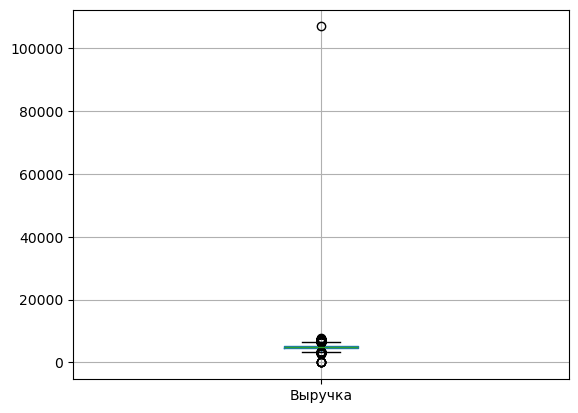

In [28]:
market_money.boxplot(column=['Выручка'])

In [29]:
market_money = market_money[market_money['Выручка'] != 106862.200000]
market_money = market_money[market_money['Выручка'] != 0]

<Axes: >

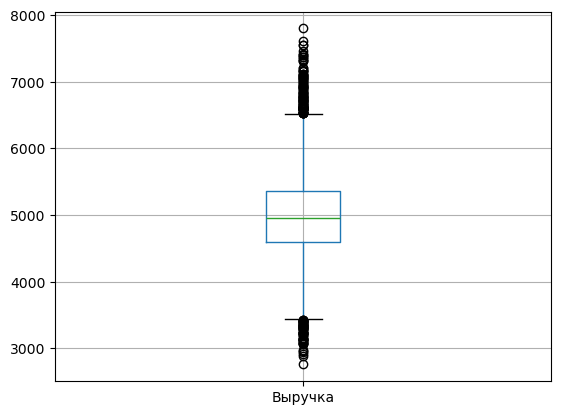

In [30]:
market_money.boxplot(column=['Выручка'])

In [31]:
# Изучим и исправим проблемы с данными в датафреме market_time

In [32]:
market_time.head(5)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [33]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц','предыдущий_месяц')
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [34]:
market_time.duplicated().sum()

0

In [35]:
market_time.isnull().sum() 

id        0
Период    0
минут     0
dtype: int64

In [36]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


<Axes: >

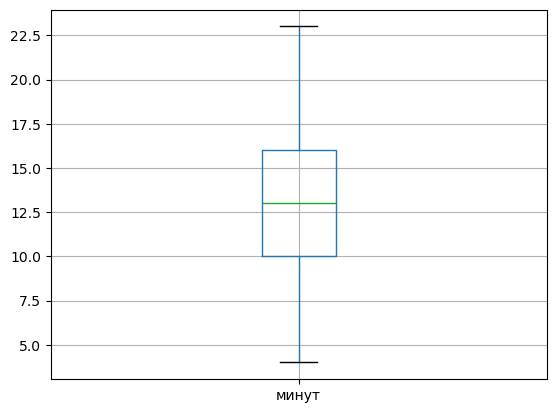

In [37]:
market_time.boxplot(column=['минут'])

In [38]:
# Изучим и исправим проблемы с данными в датафреме money

In [39]:
money.head(5)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [40]:
money.duplicated().sum()

0

In [41]:
money.isnull().sum() 

id         0
Прибыль    0
dtype: int64

In [42]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [43]:
#money['Прибыль']  = money['Прибыль'].str.replace(',', '.').astype(float)

In [44]:
#money.info()

<Axes: >

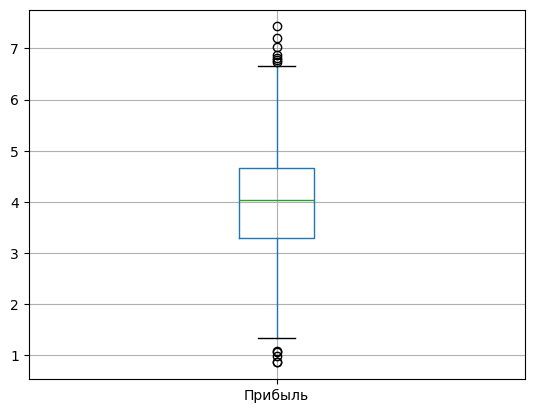

In [45]:
money.boxplot(column=['Прибыль'])

__Вывод:__

1) Выявлены дубликаты в датафрейме "market_money" и удалены, пропусков не обнаружено;

2) Выявлены и устранены дубликаты в кагориальных данных в датафреймах: "market_file" и "market_money";

3) Выявлен и удален выбрас в датафрейме "market_money";

4) Выявлена и устранена проблема с типом данных в датафрейме "money".


# 3.  Исследовательский анализ данных

__План работ:__

1. Провести исследовательский анализ данных из каждой талблицы;

2. Отобрать клиентов в покупательской активность не менее трех месяцев, т.е. таких которые что-либо покупали за этот период;

3. Сделать вывод по полученным результатам.

In [46]:
market_file.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [47]:
market_file['Покупательская активность'].unique()

array(['снизилась', 'прежний уровень'], dtype=object)

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Визуализация числевых данных датафрейма


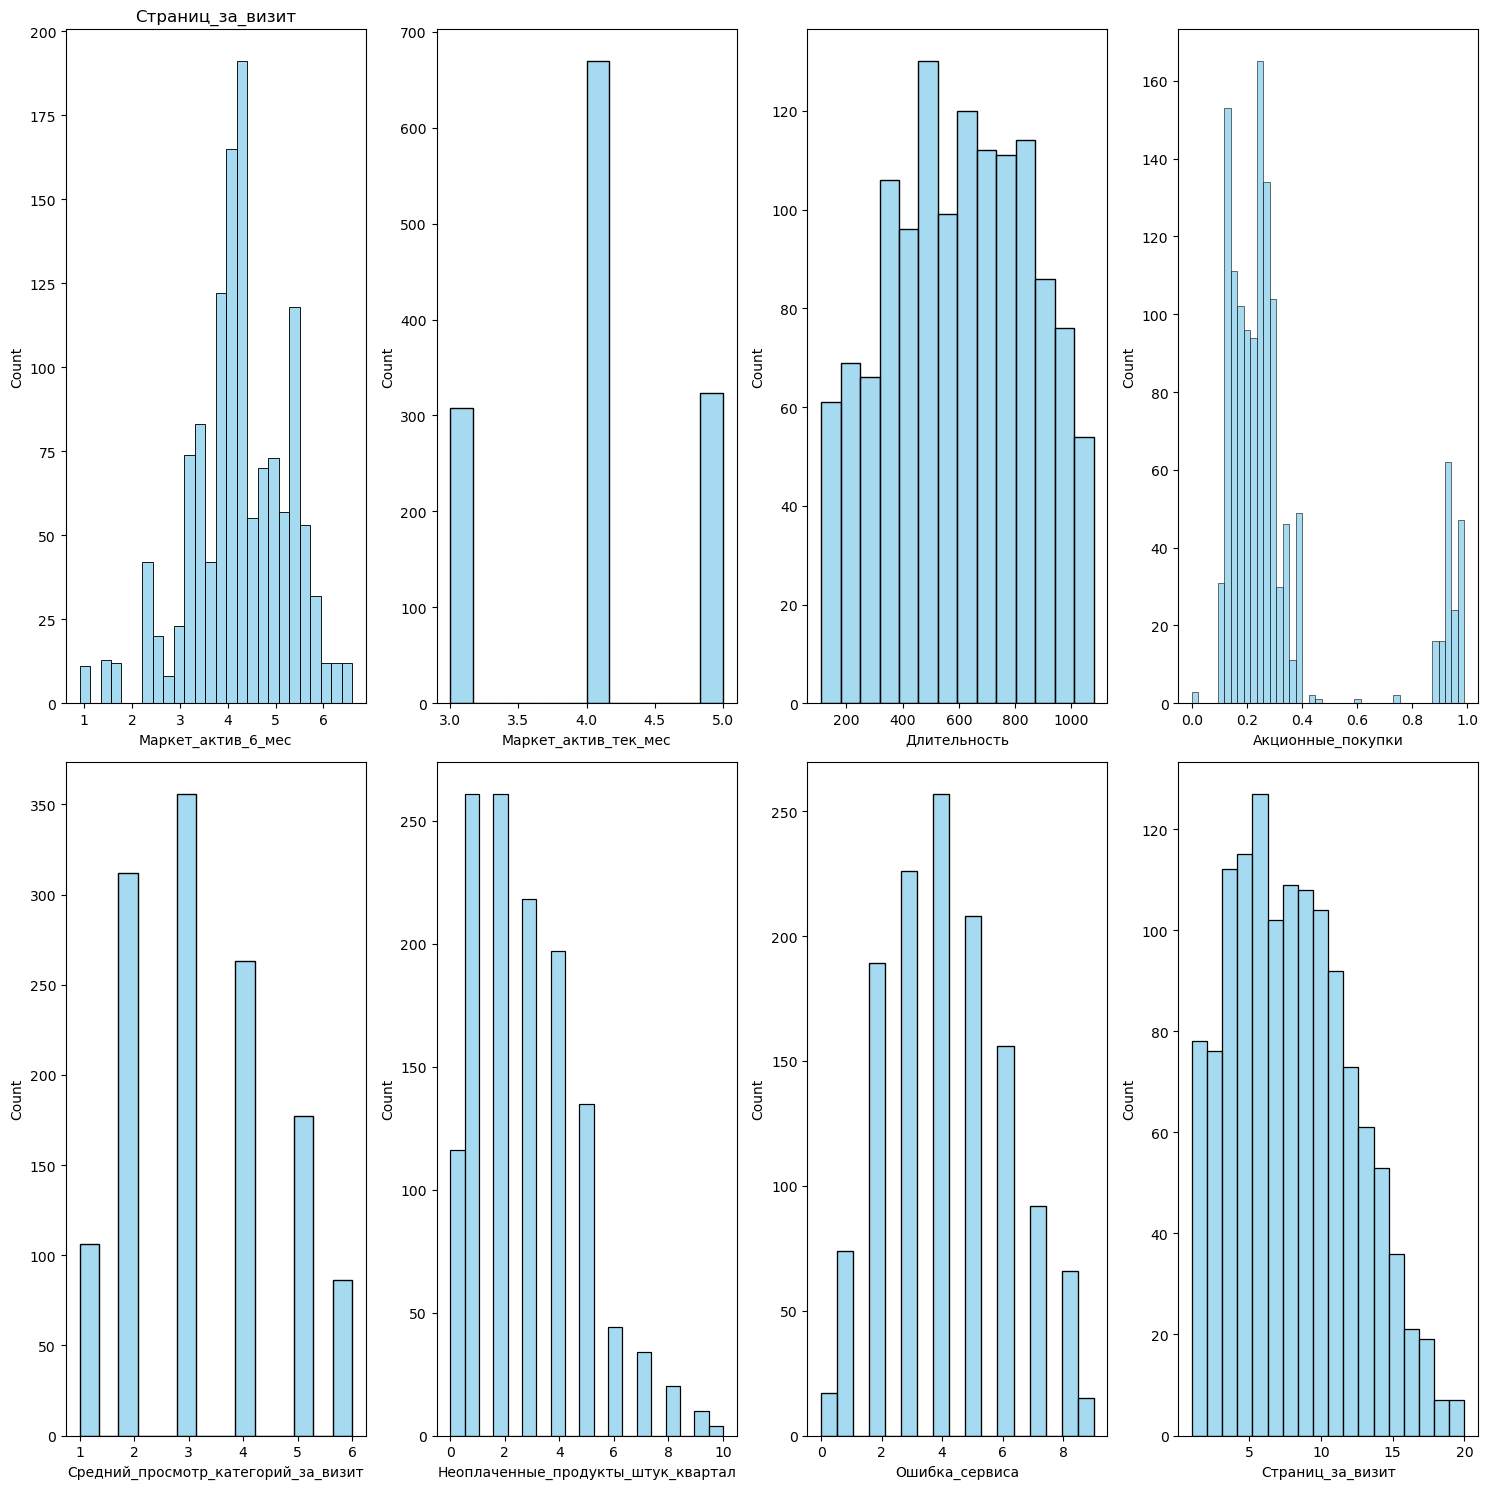

In [48]:
fig, axs = plt.subplots(2, 4, figsize=(15, 15))

sns.histplot(data=market_file, x="Маркет_актив_6_мес", color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title("Маркет_актив_6_мес")
sns.histplot(data=market_file, x="Маркет_актив_тек_мес", color="skyblue", ax=axs[0, 1])
axs[0, 0].set_title("Маркет_актив_тек_мес")
sns.histplot(data=market_file, x="Длительность", color="skyblue", ax=axs[0, 2])
axs[0, 0].set_title("Длительность")
sns.histplot(data=market_file, x="Акционные_покупки", color="skyblue", ax=axs[0, 3])
axs[0, 0].set_title("Акционные_покупки")
sns.histplot(data=market_file, x="Средний_просмотр_категорий_за_визит", color="skyblue", ax=axs[1, 0])
axs[0, 0].set_title("Средний_просмотр_категорий_за_визит")
sns.histplot(data=market_file, x="Неоплаченные_продукты_штук_квартал", color="skyblue", ax=axs[1, 1])
axs[0, 0].set_title("Неоплаченные_продукты_штук_квартал")
sns.histplot(data=market_file, x="Ошибка_сервиса", color="skyblue", ax=axs[1, 2])
axs[0, 0].set_title("Ошибка_сервиса")
sns.histplot(data=market_file, x="Страниц_за_визит", color="skyblue", ax=axs[1, 3])
axs[0, 0].set_title("Страниц_за_визит")

print('Визуализация числевых данных датафрейма')
plt.tight_layout()
plt.show()

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


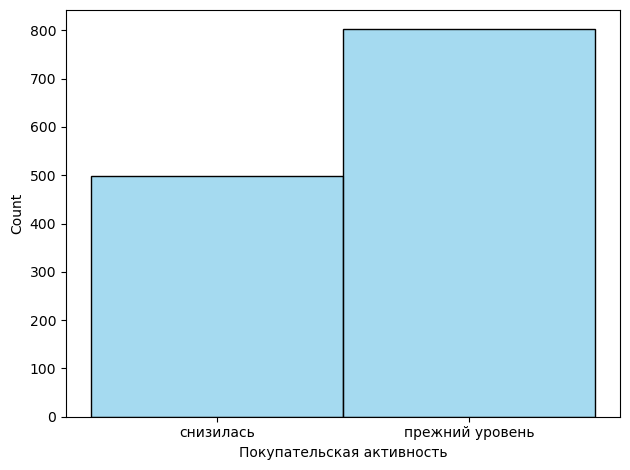

In [49]:
sns.histplot(data=market_file, x="Покупательская активность", color="skyblue")
axs[0, 0].set_title("Покупательская активность")

plt.tight_layout()
plt.show()

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


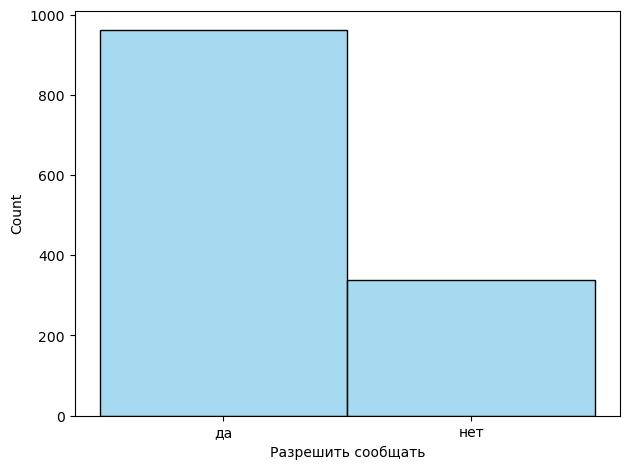

In [50]:
sns.histplot(data=market_file, x="Разрешить сообщать", color="skyblue")
axs[0, 0].set_title("Разрешить сообщать")

plt.tight_layout()
plt.show()

In [51]:
filtered_market_file = market_file[market_file['Покупательская активность'] == 'прежний уровень']
filtered_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
400,215748,прежний уровень,стандарт,нет,4.3,4,534,0.18,Кухонная посуда,3,1,4,10
401,215749,прежний уровень,премиум,да,5.8,5,624,0.30,Техника для красоты и здоровья,4,3,6,14
402,215750,прежний уровень,стандарт,да,4.8,5,634,0.21,Товары для детей,4,5,3,10
403,215751,прежний уровень,стандарт,да,4.1,4,957,0.17,Техника для красоты и здоровья,5,2,6,9
404,215752,прежний уровень,стандарт,нет,4.0,4,475,0.30,Мелкая бытовая техника и электроника,3,3,7,7


In [52]:
filtered_market_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 400 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   802 non-null    int64  
 1   Покупательская активность            802 non-null    object 
 2   Тип сервиса                          802 non-null    object 
 3   Разрешить сообщать                   802 non-null    object 
 4   Маркет_актив_6_мес                   802 non-null    float64
 5   Маркет_актив_тек_мес                 802 non-null    int64  
 6   Длительность                         802 non-null    int64  
 7   Акционные_покупки                    802 non-null    float64
 8   Популярная_категория                 802 non-null    object 
 9   Средний_просмотр_категорий_за_визит  802 non-null    int64  
 10  Неоплаченные_продукты_штук_квартал   802 non-null    int64  
 11  Ошибка_сервиса                    

In [53]:
market_money.head(5)

,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0


C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


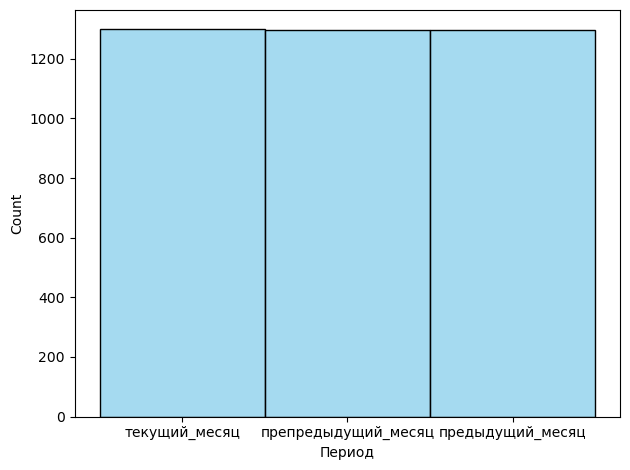

In [54]:
sns.histplot(data=market_money, x="Период", color="skyblue")
axs[0, 0].set_title("Период")

plt.tight_layout()
plt.show()

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


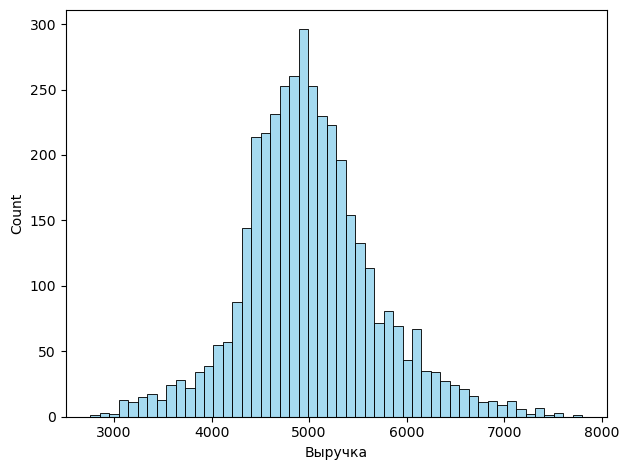

In [55]:
sns.histplot(data=market_money, x="Выручка", color="skyblue")
axs[0, 0].set_title("Выручка")

plt.tight_layout()
plt.show()

In [56]:
market_money_group = market_money.groupby('Период', as_index=False)['Выручка'].sum()
market_money_group

,Период,Выручка
0,предыдущий_месяц,6417996.5
1,препредыдущий_месяц,6272769.0
2,текущий_месяц,6802586.9


In [57]:
market_time.head(5)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


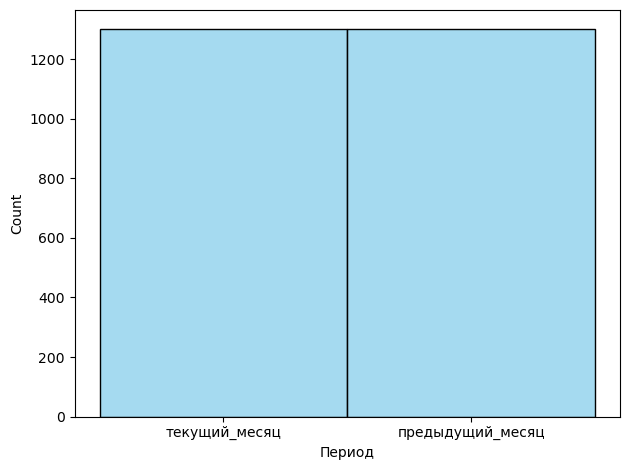

In [58]:
sns.histplot(data=market_time, x="Период", color="skyblue")
axs[0, 0].set_title("Период")

plt.tight_layout()
plt.show()

In [59]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


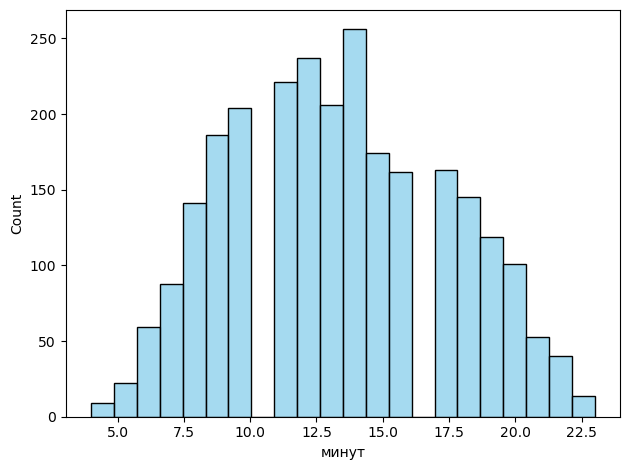

In [60]:
sns.histplot(data=market_time, x="минут", color="skyblue")
axs[0, 0].set_title("минут")

plt.tight_layout()
plt.show()

In [61]:
market_time_group = market_time.groupby('Период', as_index=False)['минут'].sum()
market_time_group

,Период,минут
0,предыдущий_месяц,17508
1,текущий_месяц,17166


In [62]:
money.head(5)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


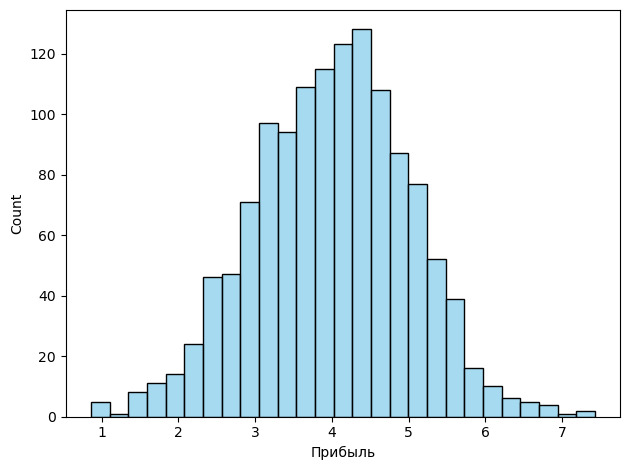

In [63]:
sns.histplot(data=money, x="Прибыль", color="skyblue")
axs[0, 0].set_title("Прибыль")

plt.tight_layout()
plt.show()

In [64]:
# отбор клиентов с покупательской активностью не менее трёх месяцев

In [65]:
market_money.head()

,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0


In [66]:
#market_money.query('Выручка == 0')

In [67]:
#market_money.info()

__Вывод:__

1) Время проведенное на сайте за прошлый и текущий месяц не изменилось, в целом время проведенное на сайте имеет нормальное распределение;

2) Вырочка в текущем месяце составила 6 802 586 , а за предыдущий 12 681 278, выроучка уменьшилась в 1,86 раза;

3) Пользовательская активность не изменилась у 802 человек и 1300, или почти у 60% аудитории.


Проведем анализ датафрейма market_file

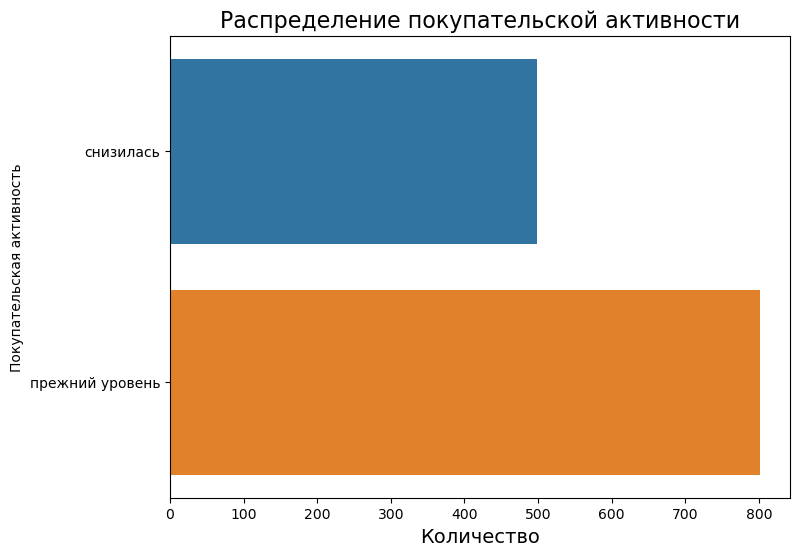

In [68]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_file, y='Покупательская активность')
plot.set_title('Распределение покупательской активности', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

Видно, что покупательская активность снизилась

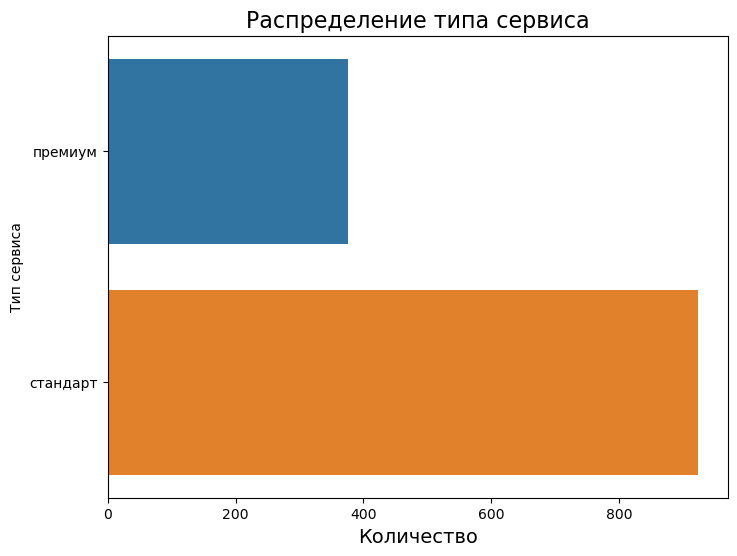

In [69]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_file, y='Тип сервиса')
plot.set_title('Распределение типа сервиса', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

Пользователей с подпиской Премиум значительно меньше, чем со Стандартной подпиской

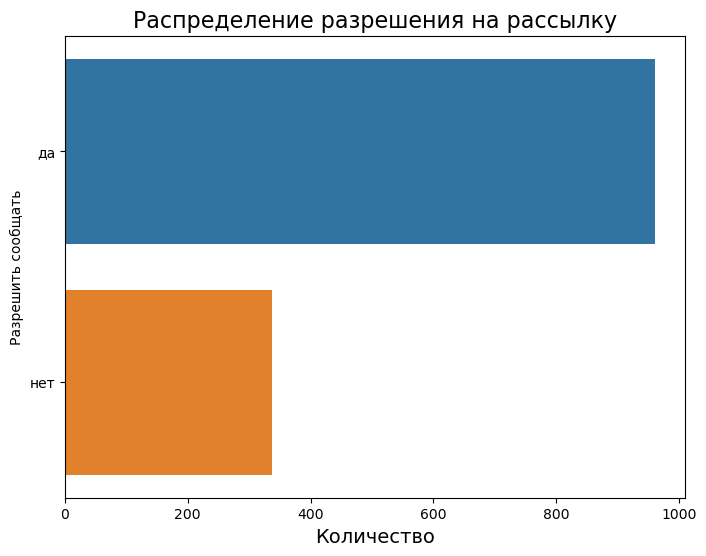

In [70]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_file, y='Разрешить сообщать')
plot.set_title('Распределение разрешения на рассылку', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

Пользователи значительно реже запрещают отправлять информацию о дополнительных предлажениях о товарах

Далее рассмотрим влиеяние числовых значений на снижение активности, и отдельно рассмотрим Популярные категории

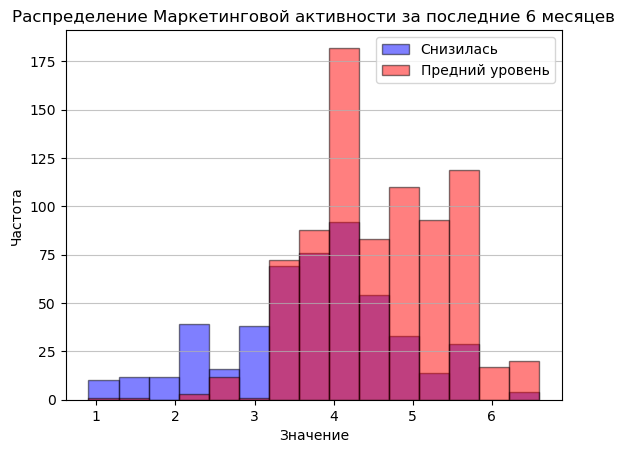

In [71]:
market_file[market_file['Покупательская активность'] =='снизилась']['Маркет_актив_6_мес'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Маркет_актив_6_мес'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение Маркетинговой активности за последние 6 месяцев')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

На гистограмме видно, что при снижении маркетинговой активности за 6 месяцев снижается пользовательская активность

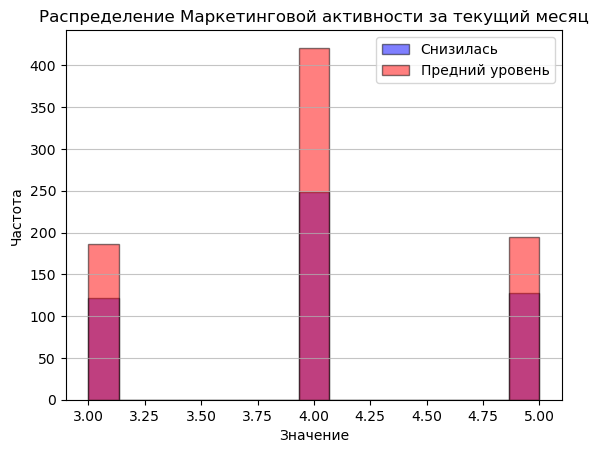

In [72]:
market_file[market_file['Покупательская активность'] =='снизилась']['Маркет_актив_тек_мес'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Маркет_актив_тек_мес'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение Маркетинговой активности за текущий месяц')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

Аналогично, видно, что при снижении маркетинговой активности, снижается пользовательская активность

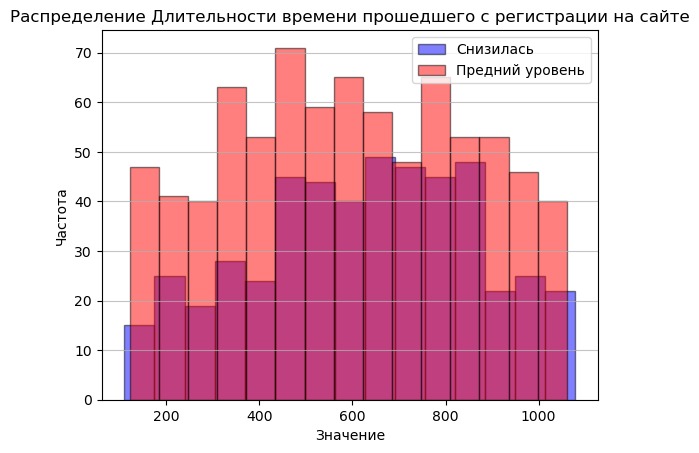

In [73]:
market_file[market_file['Покупательская активность'] =='снизилась']['Длительность'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Длительность'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение Длительности времени прошедшего с регистрации на сайте')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

На гистограмме видно, что пользовательская активность снижается у "новых" пользователей больше, чем у "старых"

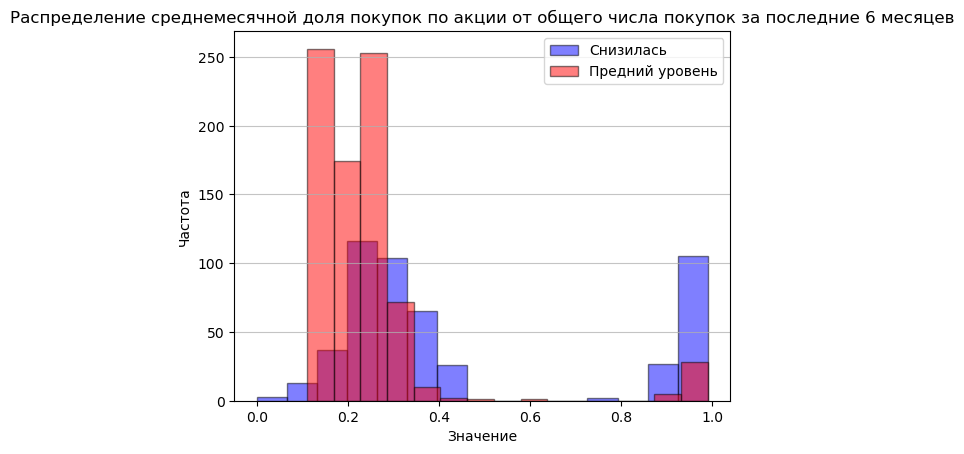

In [74]:
market_file[market_file['Покупательская активность'] =='снизилась']['Акционные_покупки'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Акционные_покупки'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение среднемесячной доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

Получается интресная картина, больше снизилась активность у пользователей которые пользуются скидками, и много пользователей не особо ориентируются на скидки.

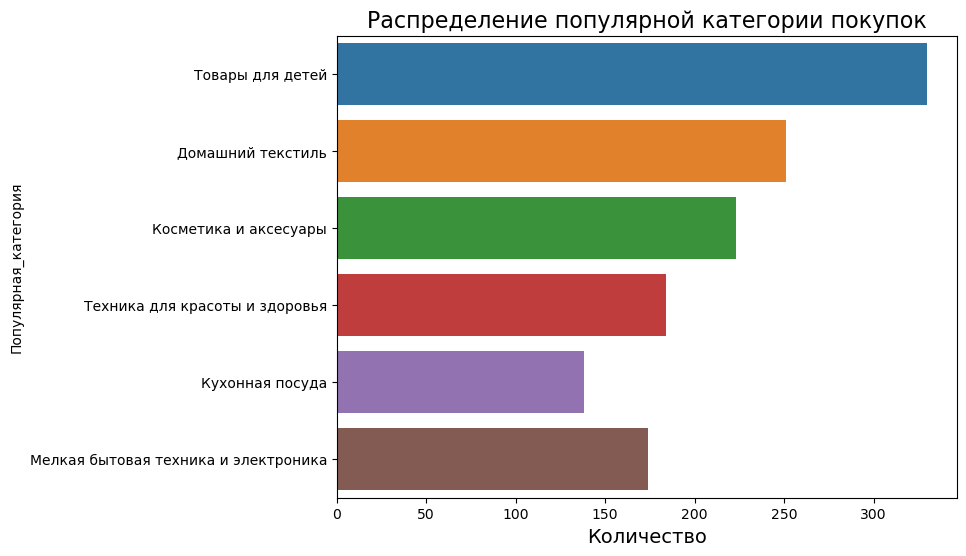

In [75]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_file, y='Популярная_категория')
plot.set_title('Распределение популярной категории покупок', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

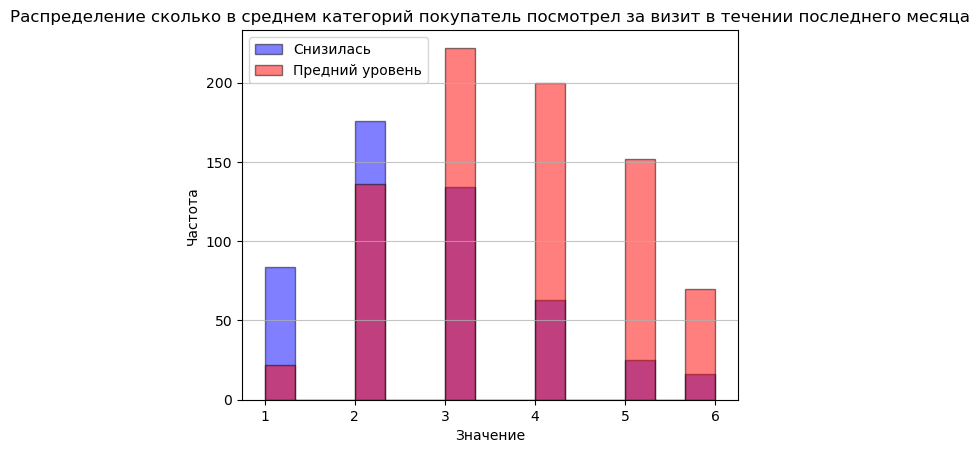

In [76]:
market_file[market_file['Покупательская активность'] =='снизилась']['Средний_просмотр_категорий_за_визит'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Средний_просмотр_категорий_за_визит'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение сколько в среднем категорий покупатель посмотрел за визит в течении последнего месяца')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

Из гистограммы видно, что активность пользователей снизилась у пользователей которые просматривают меньше категорий, чем у пользователей которые остались на прежнем уровне

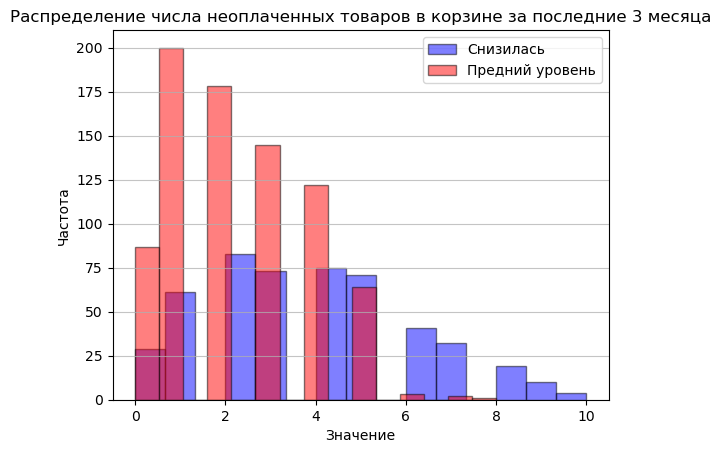

In [77]:
market_file[market_file['Покупательская активность'] =='снизилась']['Неоплаченные_продукты_штук_квартал'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Неоплаченные_продукты_штук_квартал'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение числа неоплаченных товаров в корзине за последние 3 месяца')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75) 

Получается, что чем больше неоплаченных товаров тем больше снижается активность пользователей

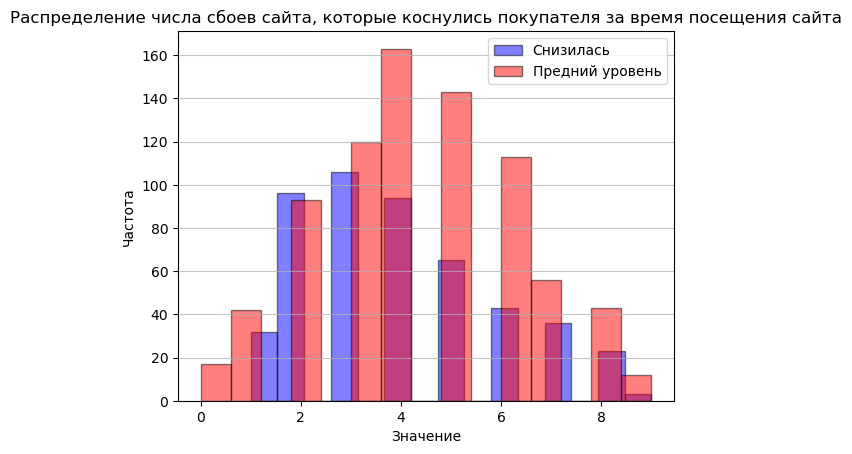

In [78]:
market_file[market_file['Покупательская активность'] =='снизилась']['Ошибка_сервиса'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Ошибка_сервиса'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение числа сбоев сайта, которые коснулись покупателя за время посещения сайта')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)

В среднем за одно посещения сайта, происходит 4 сбоя, это печально

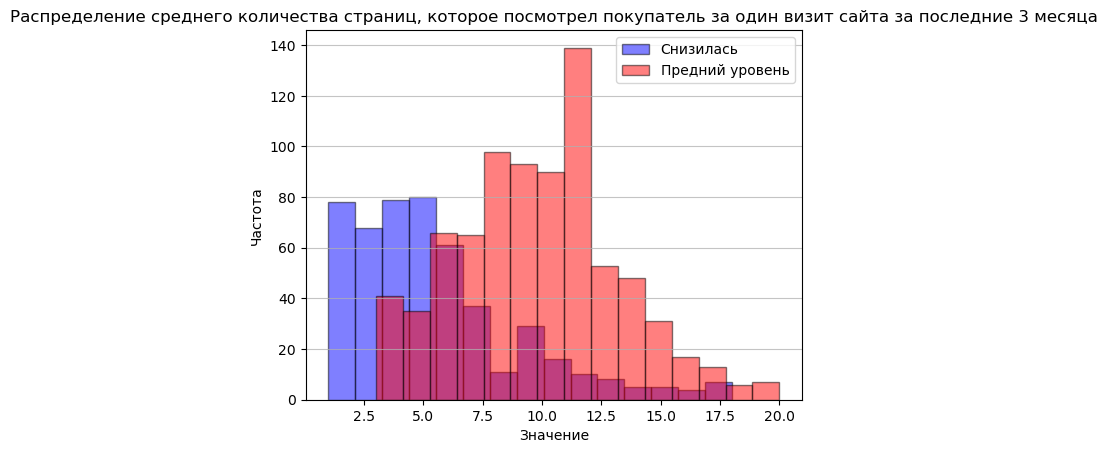

In [79]:
market_file[market_file['Покупательская активность'] =='снизилась']['Страниц_за_визит'].plot(kind='hist', alpha=0.5, color='blue', bins=15, label='Снизилась', edgecolor='black')
market_file[market_file['Покупательская активность'] =='прежний уровень']['Страниц_за_визит'].plot(kind='hist', alpha=0.5, color='red', bins=15, label='Предний уровень', edgecolor='black')

plt.title('Распределение среднего количества страниц, которое посмотрел покупатель за один визит сайта за последние 3 месяца')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.75)

Чем больше пользователь посмотрел страниц сайта, тем меньше вероятность снижения его активности

По анализу датафрейма market_file, портрет покупаетля со сниженной активностью следующий: мало просматривал страниц за один визит на сайт, имел много сбоев сайта за один сеанс, имел много неоплаченных товаров в корзине, мало просмотренно категорий товаров, делал много акционных покупок. Разницы в "новых" или "старых" пользователях сайта особо не наблюдается, как в маркетинговой активноности за предыдущий месяц. Имеется разница в маркетинговой активности за последниее 6 месяцев, такой активности пользователь получил меньше.

Проведем анализ датафрейма market_money

In [80]:
market_money_group = market_money.groupby('Период', as_index=False)['Выручка'].sum()
market_money_group

,Период,Выручка
0,предыдущий_месяц,6417996.5
1,препредыдущий_месяц,6272769.0
2,текущий_месяц,6802586.9


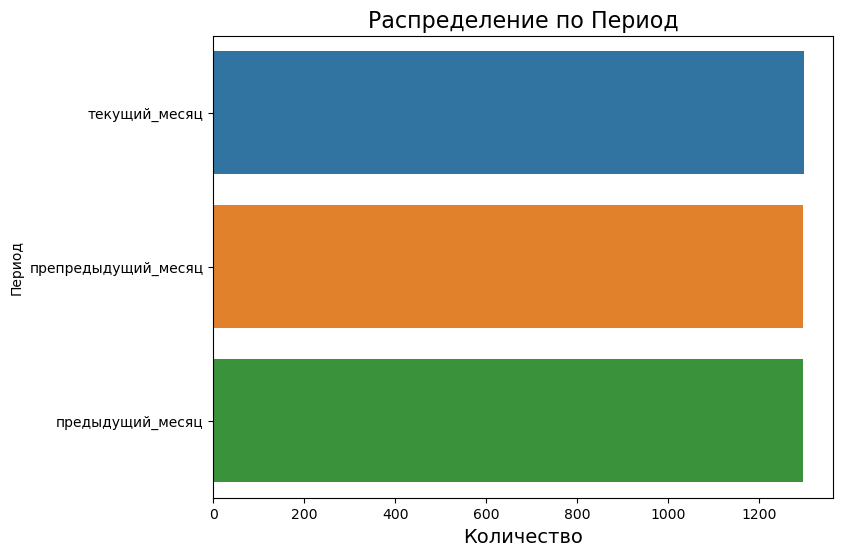

In [81]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_money, y='Период')
plot.set_title('Распределение по Период', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


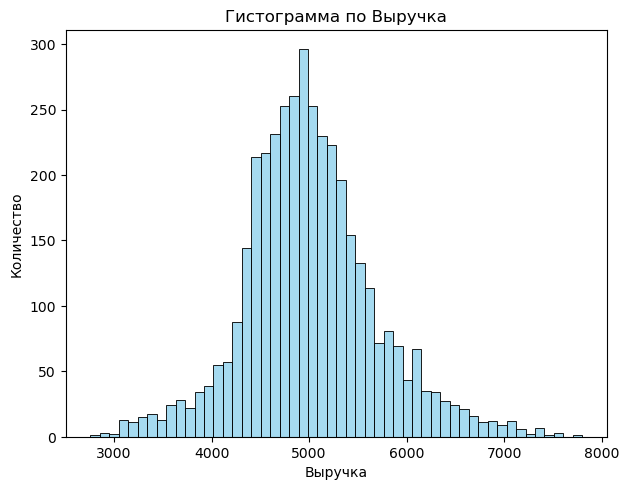

In [82]:
sns.histplot(data=market_money, x="Выручка", color="skyblue")

plt.tight_layout()
plt.title('Гистограмма по Выручка')
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.show()

Вывод по датафрейму market_money распределение выручки по трем месяцам примерно равна. Выручка имеет нормальное распределение.

Проведем анализ датафрейма market_time

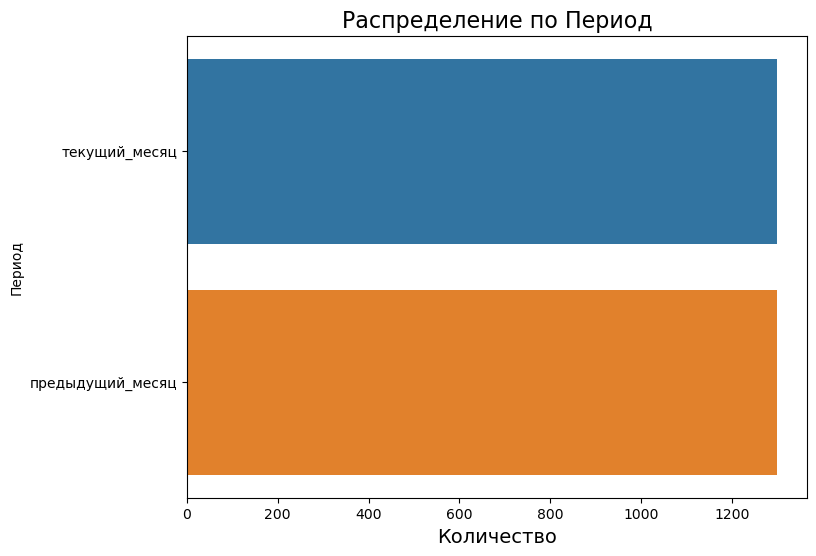

In [83]:
plt.figure(figsize=(8,6))
plot = sns.countplot(data=market_time, y='Период')
plot.set_title('Распределение по Период', fontsize=16)
plot.set_xlabel('Количество', fontsize=14)
plt.show()

In [84]:
market_time_group = market_time.groupby('Период', as_index=False)['минут'].sum()
market_time_group

,Период,минут
0,предыдущий_месяц,17508
1,текущий_месяц,17166


C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


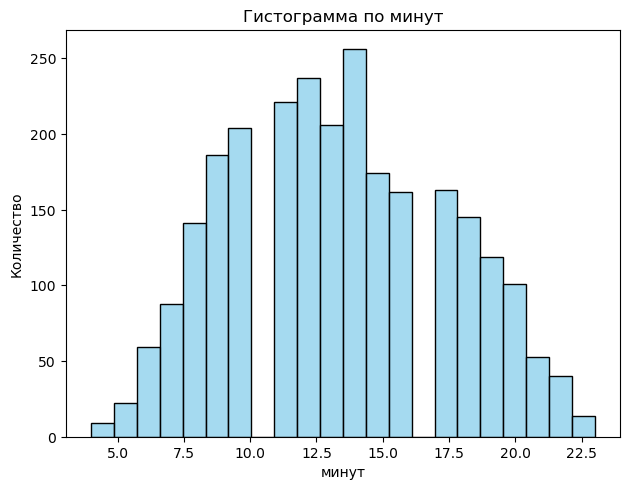

In [85]:
sns.histplot(data=market_time, x="минут", color="skyblue")

plt.tight_layout()
plt.title('Гистограмма по минут')
plt.xlabel('минут')
plt.ylabel('Количество')
plt.show()

Вывод по датафрейму market_time: время проведенное на сайте по периоднам практически не отличается. Время проведенное на сайте имеет нормальное распределение.

__Вывод:__

1) По анализу датафрейма market_file, портрет покупаетля со сниженной активностью следующий: мало просматривал страниц за один визит на сайт, имел много сбоев сайта за один сеанс, имел много неоплаченных товаров в корзине, мало просмотренно категорий товаров, делал много акционных покупок. Разницы в "новых" или "старых" пользователях сайта особо не наблюдается, как в маркетинговой активноности за предыдущий месяц. Имеется разница в маркетинговой активности за последниее 6 месяцев, такой активности пользователь получил меньше.

2) Вывод по датафрейму market_money распределение выручки по трем месяцам примерно равна. Выручка имеет нормальное распределение.

3) Вывод по датафрейму market_time: время проведенное на сайте по периоднам практически не отличается. Время проведенное на сайте имеет нормальное распределение.

# 4.  Объединение таблиц

__План работ:__
    
1) Объеденить market_file.csv, market_money.csv, market_time.csv;

2) В итоговой таблице сделать отдельный столбец для каждого периода.

In [86]:
market_money_ = market_money.pivot(index='id', columns='Период', values='Выручка')
market_money_=market_money_.reset_index()
market_money_.columns = ['id', 'Выручка_2месяц', 'Выручка_3месяц', 'Выручка_1месяц']
market_money_cut = market_money_.query('Выручка_2месяц>0 and Выручка_3месяц>0 and Выручка_1месяц<10000')
display(market_money_cut.head(3))
market_money_cut.shape

,id,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4


(1296, 4)

In [87]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [88]:
market_time_ = market_time.pivot(index='id', columns='Период', values='минут')
market_time_ = market_time_.reset_index()
market_time_.columns = ['id', 'минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_cut = market_time_.query('минут_предыдущий_месяц>0 and минут_текущий_месяц>0')
display(market_time_cut.head())                             
market_time_cut.shape

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


(1300, 3)

In [89]:
merged = market_file.merge(market_money_cut, on='id', how='inner').merge(market_time_cut, on='id', how='inner')
merged.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [90]:
merged = merged.set_index('id')

In [91]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1296 non-null   object 
 1   Тип сервиса                          1296 non-null   object 
 2   Разрешить сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит            

__Вывод:__

1) Объединено три таблицу в одну;

2) Добавлены отдельные столбцы для каждого периода.

# 5.  Корреляционный анализ

__План работ:__

1) Провести корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 

2) Сделать выводы о мультиколлинеарности и при необходимости устраните её.

In [92]:
merged.head(3)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13


interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_2месяц', 'Выручка_3месяц', 'Выручка_1месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


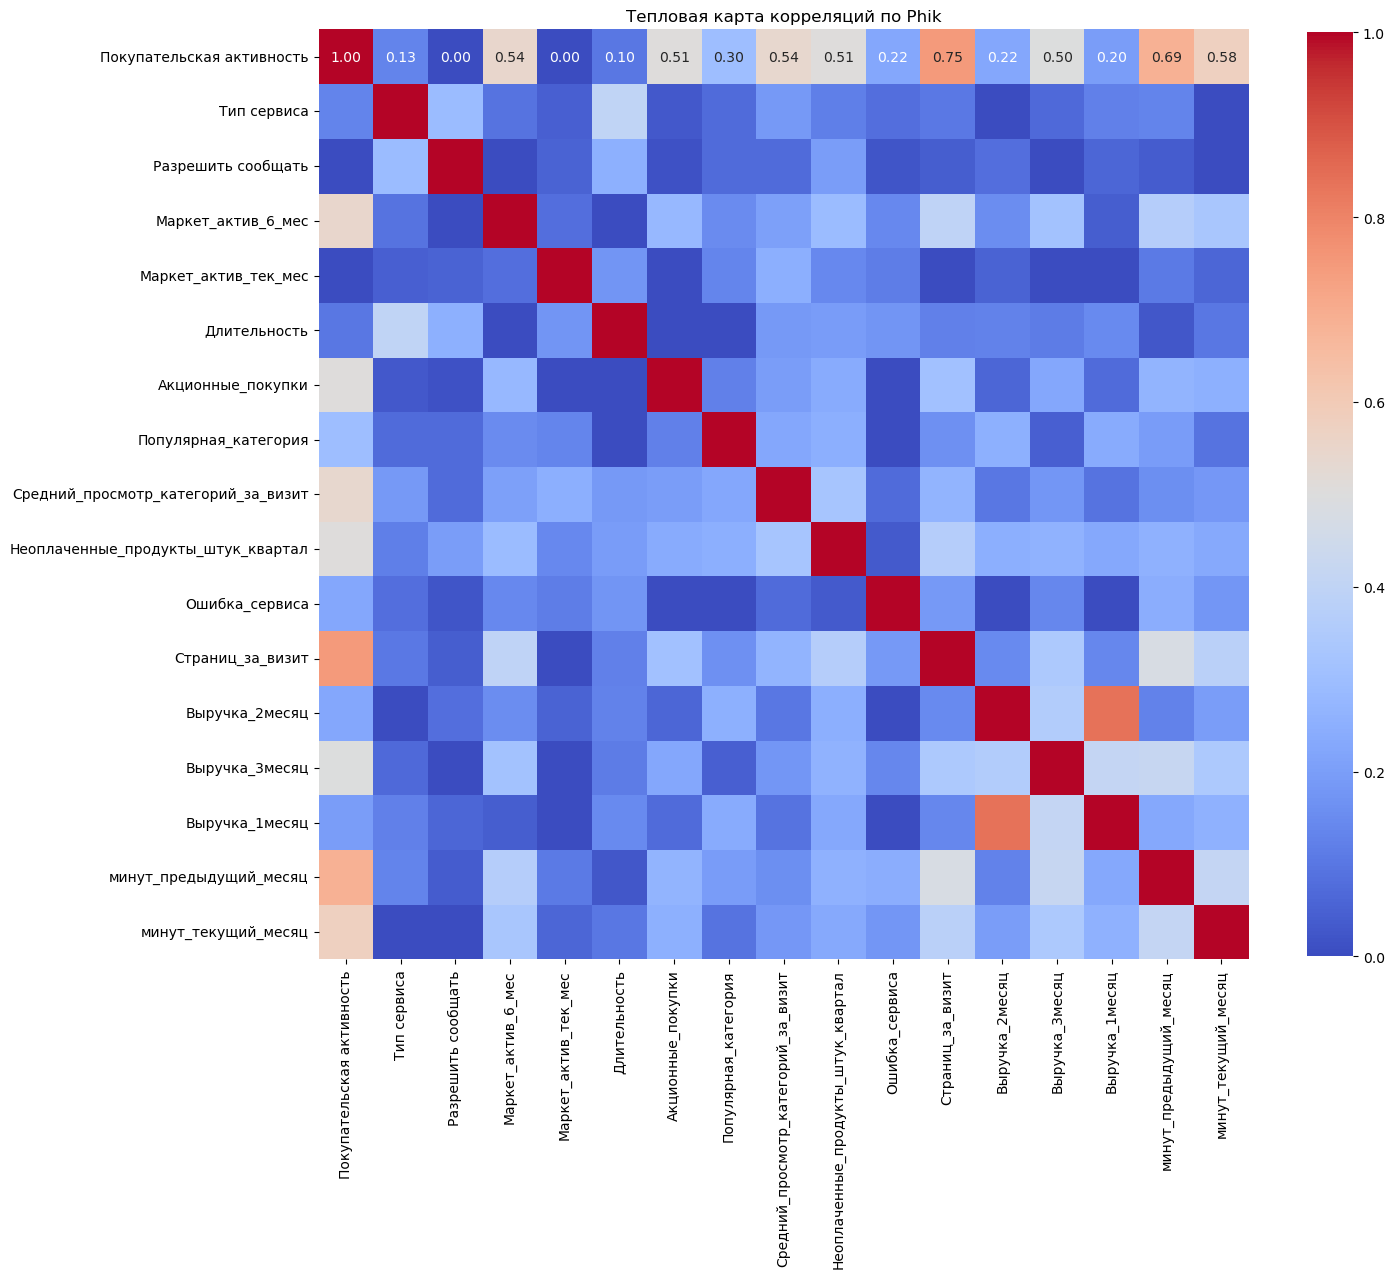

In [93]:
phik_matrix_merged = merged.phik_matrix()

plt.figure(figsize=(15, 15))

sns.heatmap(phik_matrix_merged, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

plt.title('Тепловая карта корреляций по Phik')

plt.show()

__Выводы:__

1) Целевым признаком является "Покупательская активность", с ним коррелируют следующие данные: "Маркет_актив_6_мес", "Акционные_покупки", "Средний_просмотр_категорий_за_визит", "Неоплаченные_продукты_штук_квартал", "Страниц_за_визит", "Выручка_3месяц", "минут_предыдцщий_месяц", "минут_текущий_месяц".

2) Отсутствует мультиколлинеарность переменных


# 6.  Использование пайплайнов

__План работ:__

1) Во время подготовки использовать данных ColumnTransformer. Количественные и категориальные признаки обработать в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера. Для каждой модели можно подготовить данные с разным кодированием и масштабированием;

2) Обучить четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подобрать минимум один гиперпараметр. Выберать подходящую для задачи метрику, аргументировать свой выбор. Использовать эту метрику при подборе гиперпараметров;

3) Выбрать лучшую модель, используя заданную метрику. Для этого применить одну из стратегий:

- использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;

- использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт лучшую модель.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    merged.drop(['Покупательская активность'], axis=1),
    merged['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = merged['Покупательская активность'])

#X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['Популярная_категория']
ord_columns = ['Тип сервиса', 'Разрешить сообщать']
num_columns = ['Маркет_актив_6_мес',
               'Маркет_актив_тек_мес',
               'Длительность',
               'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал',
               'Ошибка_сервиса',
               'Страниц_за_визит',
               'Выручка_2месяц',
               'Выручка_3месяц',
               'Выручка_1месяц',
               'минут_предыдущий_месяц',
               'минут_текущий_месяц']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)
#drop='first',
# sparse_output=False
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт'],
                    ['да', 'нет'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)    

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 9),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
               

In [95]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.92


In [96]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика F1-score на тестовой выборке: 0.9


__Вывод:__

1) Построен один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель;

2) Лучшая модель LogisticRegression с гиперпаратметрами C=1, penalty='l1', random_state=42, solver='liblinear';

3) Метрика 'roc_auc' лучшей модели на тестовой выборке: 0,92 и F1-score 0,89. Показатели хорошие, модель очень хорошо справляется с прогнозом.

# 7.  Анализ важности признаков

__План работ:__

1) Оценить важность признаков для лучшей модели и постройте график важности с помощью метода SHAP;

2) Сделать выводы о значимости признаков:

- какие признаки мало значимы для модели;

- какие признаки сильнее всего влияют на целевой признак;

- как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.


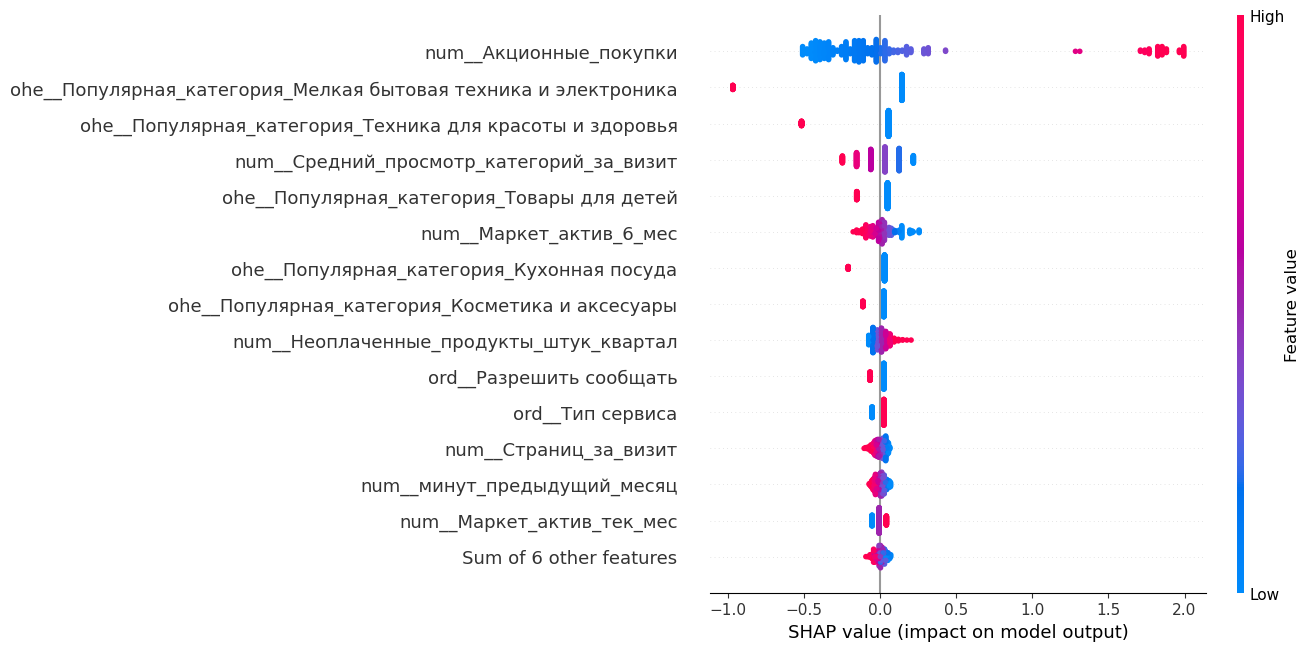

In [97]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

#shap.TreeExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
 
shap_values = explainer(X_test_2)
 
shap.plots.beeswarm(shap_values[:,:,0], max_display=15)

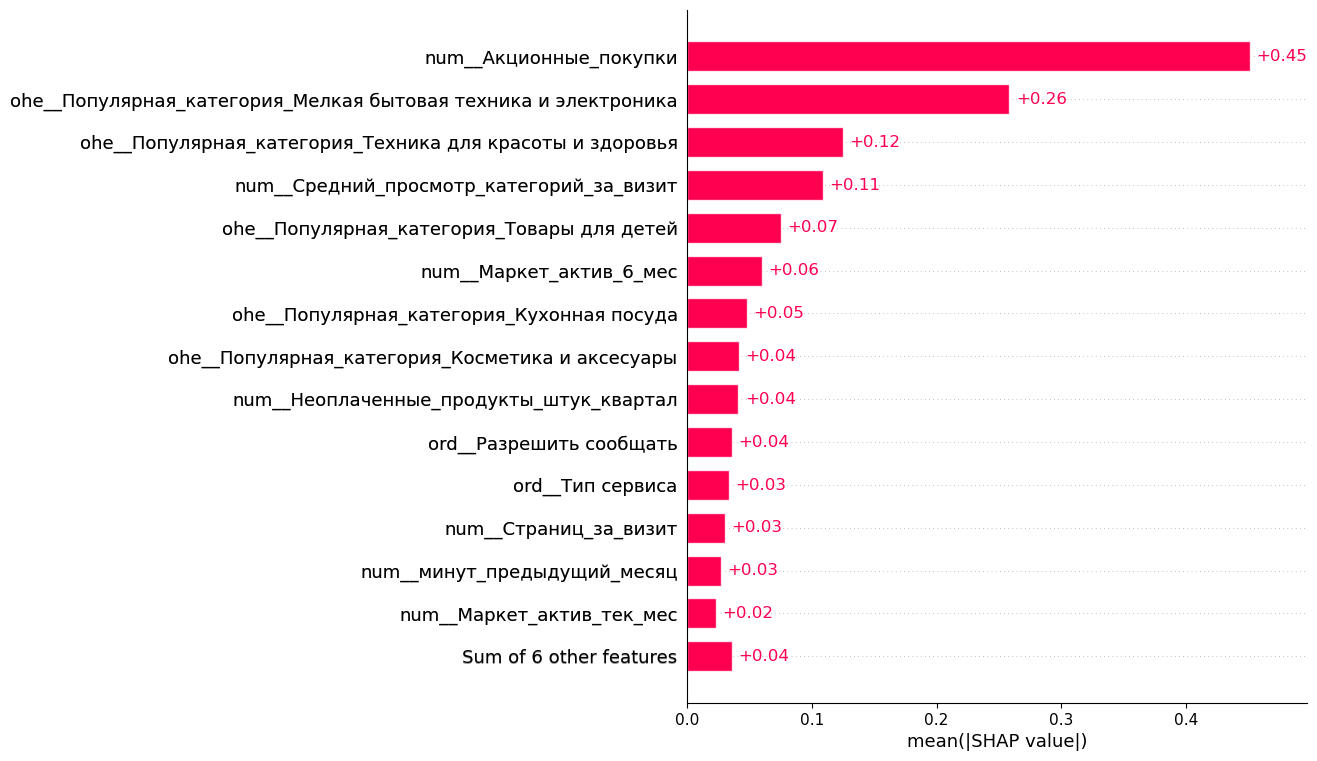

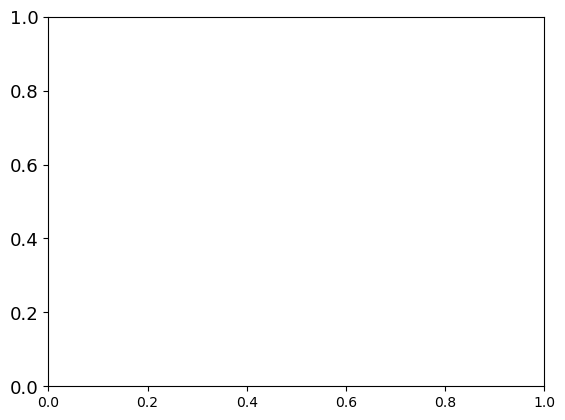

In [98]:
shap.plots.bar(shap_values[:,:,0], max_display=15)
plt.tick_params(axis='y', labelsize=13)
plt.show()

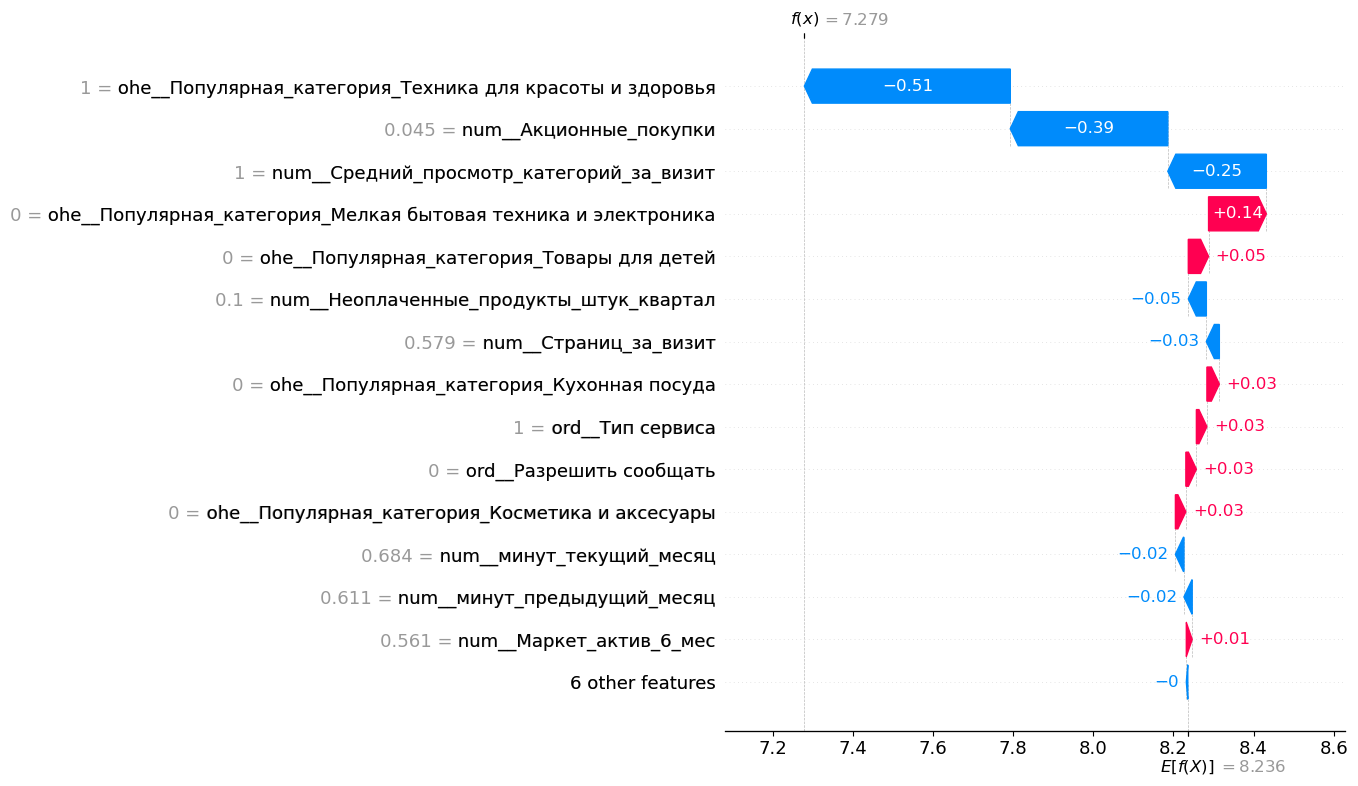

In [99]:
shap.plots.waterfall(shap_values[0, :, 0], max_display=15)

__Вывод:__

1) Построены графики важности признаков модели с помощью метода SHAP;

2) Самые важные для модели признаки: 

- Популярная_категория_Техника для красоты и здоровья;

- Средний просмотр категорий за визит;

- Страниц за визит;

- минут_предыдущий_месяц;

- минут_текущий_месяц;

- неоплаченные_продукты_квартал;

3) Малозначеные признаки для модели:

- Популярная категория (кроме Техники для красоты и здоровья);

- Маркет_актив_тек_мес;

- Разрешить сообщать;

- Тип сервиса;

- Ошибка сервиса;

- Выручка_1месяц;

- Выручка_2месяц;

- Выручка_3месяц;

4) Рекомендация бизнесу для того чтобы покупатель при носил прибыль, нужно сделать так что бы пользователь больше времени проводил в интернет магазине, просматривал больше страниц, и добавлял товары в козину, даже если их сейчас не купит. Можно проанализировать UI/UX дизайн сайта, дальше развивать категорию с товарами Тезника для красоты и здоровья. 

__Вывод:__

1) Построены графики важности признаков модели с помощью метода SHAP;

2) Самые важные для модели признаки: 

- Популярная_категория_Техника для красоты и здоровья;

- Средний просмотр категорий за визит;

- Страниц за визит;

- минут_предыдущий_месяц;

- минут_текущий_месяц;

- неоплаченные_продукты_квартал;

3) Малозначеные признаки для модели:

- Популярная категория (кроме Техники для красоты и здоровья);

- Маркет_актив_тек_мес;

- Разрешить сообщать;

- Тип сервиса;

- Ошибка сервиса;

- Выручка_1месяц;

- Выручка_2месяц;

- Выручка_3месяц;

# 8.  Сегментация покупателей

__План работ:__

1) Выполнить сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей;

2) Выберать группу покупателей и предложить, как увеличить её покупательскую активность:

- Провести графическое и аналитическое исследование группы покупателей;

- Сделать предложения по работе с сегментом для увеличения покупательской активности.

2) Сделать выводы о сегментах:

- Какой сегмент следует взять для дополнительного исследования;

- Какие предложения следует сделать и почему.

__План работ:__

1) Выбрать группу покупателей и предложить, как увеличить её покупательскую активность:

- Провести графическое и аналитическое исследование группы покупателей;

- Сделать предложения по работе с сегментом для увеличения покупательской активности.

2) Выполнить сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей;

3) Сделать выводы о сегментах:

- Какой сегмент следует взять для дополнительного исследования;

- Какие предложения следует сделать и почему.

In [100]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [101]:
X_test.head(3)

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17
215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9
216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11


In [102]:
X_test_merged = X_test.copy()
X_train_merged = X_train.copy()

X_test_merged['вероятность_снижения'] = y_test_proba
X_train_merged['вероятность_снижения'] = y_train_proba
df_merged = pd.concat([X_train_merged, X_test_merged])

money = money.set_index('id')
df_merged = df_merged.join(money)

In [103]:
df_merged.head()

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,Прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,0.050717,4.37
215361,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,0.798021,4.03
215884,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,0.073440,4.37
216564,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,0.756949,5.58
215715,премиум,да,3.6,5,873,0.39,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,0.790161,4.87


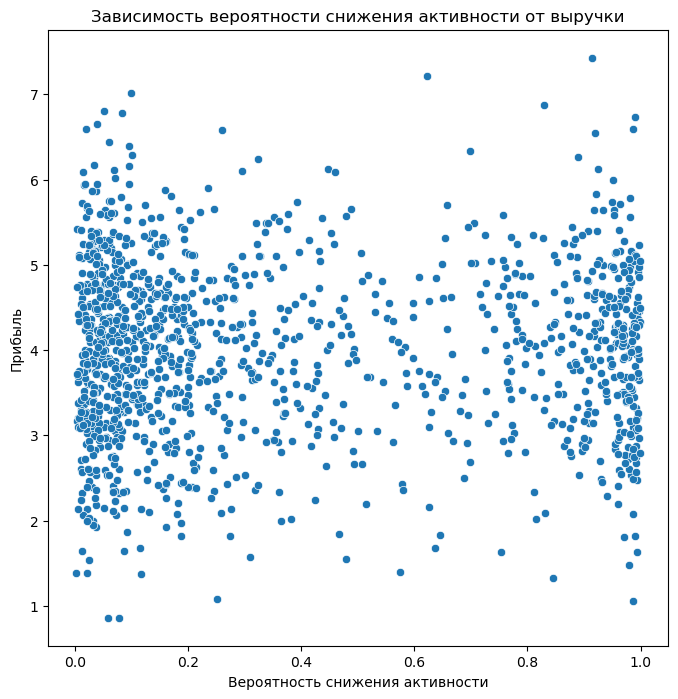

In [104]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_merged, y='Прибыль', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

Не наблюдаю на диаграмме рассеивания зависимости вероятности активности пользователя от прибыли.

In [105]:
#fig = plt.figure(figsize=(8,8))
#sns.scatterplot(data=df_merged, y='Прибыль', x='вероятность_снижения')
#plt.xlabel('Вероятность снижения активности')
#plt.ylabel('Прибыль')
#plt.title('Зависимость вероятности снижения активности от выручки')
#plt.show()

In [106]:
#Вероятность снижения активности не имеет зависимость от типа сервиса.

In [107]:
#fig = plt.figure(figsize=(8,8))
#sns.scatterplot(data=df_merged, y='Разрешить сообщать', x='вероятность_снижения')
#plt.xlabel('Вероятность снижения активности')
#plt.ylabel('Разрешить сообщать')
#plt.title('Зависимость вероятности снижения активности от разрешения сообщать информацию о доп. предложениях')
#plt.show()

In [108]:
#Тоже нет зависимости

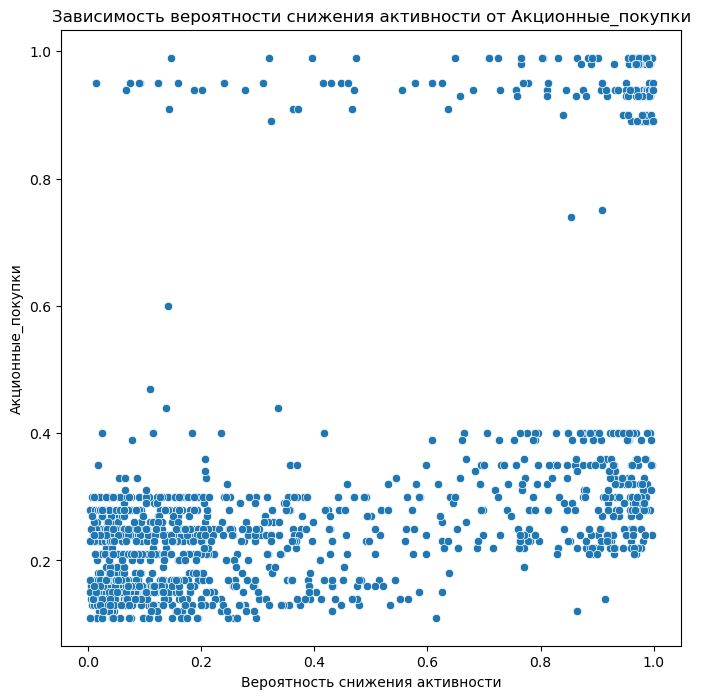

In [109]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_merged, y='Акционные_покупки', x='вероятность_снижения')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Акционные_покупки')
plt.title('Зависимость вероятности снижения активности от Акционные_покупки')
plt.show()

Наложим полученные данные по вероятности снижения активности с прибылю и акционными покупками. Есть большая вероятность снижения активности в акционных покупках. Рассмотрим этот подробнее. 

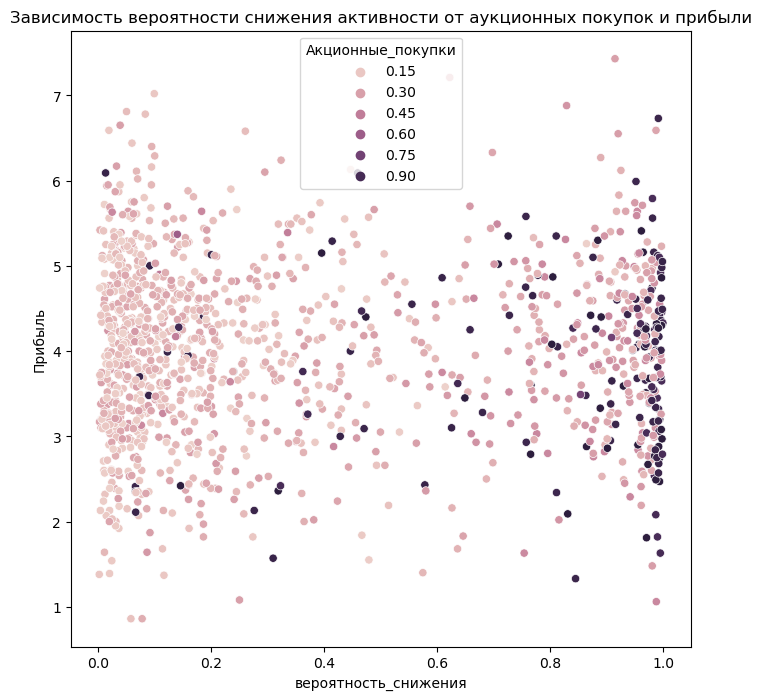

In [110]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(
    x="вероятность_снижения",
    y="Прибыль",
    data=df_merged,
    hue='Акционные_покупки'
)
plt.title('Зависимость вероятности снижения активности от аукционных покупок и прибыли')
plt.show()

На объедененном графике видно, что что акционные покупки имеют высокую стоимость и высокую вероятность снижения пользовательской активности. Вероятно, что хорошие скидки бывают редко, и соотвественно от этого зависят покупки.

Для анализа сегмента с акционными покупками, возбмем диапозон больше 80%, т.к. больше вероятности снижения находятся в диапозоне от 0,8 до 1 

In [111]:
#fig = plt.figure(figsize=(8,8))
#sns.scatterplot(data=df_merged, y='Популярная_категория', x='вероятность_снижения')
#plt.xlabel('Вероятность снижения активности')
#plt.ylabel('Популярная_категория')
#plt.title('Зависимость вероятности снижения активности от Популярная_категория')
#plt.show()

In [112]:
#Рассмотрим подробнее популярную категорию покупок и вероятность снижения активности. 

In [113]:
df_merged.head(3)

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,Прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,0.050717,4.37
215361,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,0.798021,4.03
215884,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,0.073440,4.37


In [114]:
df_merged['сегмент'] = np.where(df_merged['вероятность_снижения'] > 0.8, 'вероятность высокая', 'вероятность низкая')

In [115]:
df_merged.head(3)

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,Прибыль,сегмент
id,,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,0.050717,4.37,вероятность низкая
215361,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,0.798021,4.03,вероятность низкая
215884,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,0.073440,4.37,вероятность низкая


In [116]:
high_probability_df = df_merged[df_merged['сегмент'] == 'вероятность высокая']
high_probability_df.head(3)

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,Прибыль,сегмент
id,,,,,,,,,,,,,,,,,,,
215674,стандарт,да,3.0,4,304,0.25,Домашний текстиль,1,6,5,3,4789.5,4305.0,4762.2,11,11,0.977285,2.72,вероятность высокая
215656,стандарт,да,3.8,5,217,0.39,Косметика и аксесуары,2,2,5,4,4497.0,4227.0,5642.3,7,10,0.906114,3.25,вероятность высокая
215448,премиум,да,4.6,4,974,0.94,Домашний текстиль,4,3,3,7,5351.0,4670.0,6129.7,9,10,0.906345,2.95,вероятность высокая


C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


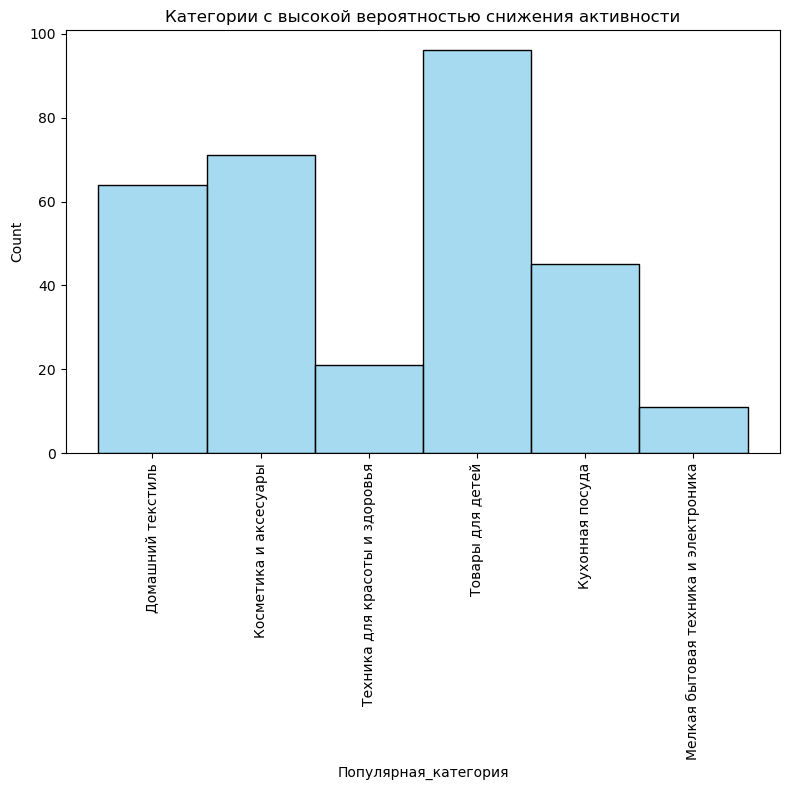

In [117]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Популярная_категория", color="skyblue")
axs[0, 0].set_title("Популярная_категория")
plt.xticks(rotation=90)
plt.title("Категории с высокой вероятностью снижения активности")
plt.tight_layout() 
plt.show()

In [118]:
high_probability_df.head(3)

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_2месяц,Выручка_3месяц,Выручка_1месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения,Прибыль,сегмент
id,,,,,,,,,,,,,,,,,,,
215674,стандарт,да,3.0,4,304,0.25,Домашний текстиль,1,6,5,3,4789.5,4305.0,4762.2,11,11,0.977285,2.72,вероятность высокая
215656,стандарт,да,3.8,5,217,0.39,Косметика и аксесуары,2,2,5,4,4497.0,4227.0,5642.3,7,10,0.906114,3.25,вероятность высокая
215448,премиум,да,4.6,4,974,0.94,Домашний текстиль,4,3,3,7,5351.0,4670.0,6129.7,9,10,0.906345,2.95,вероятность высокая


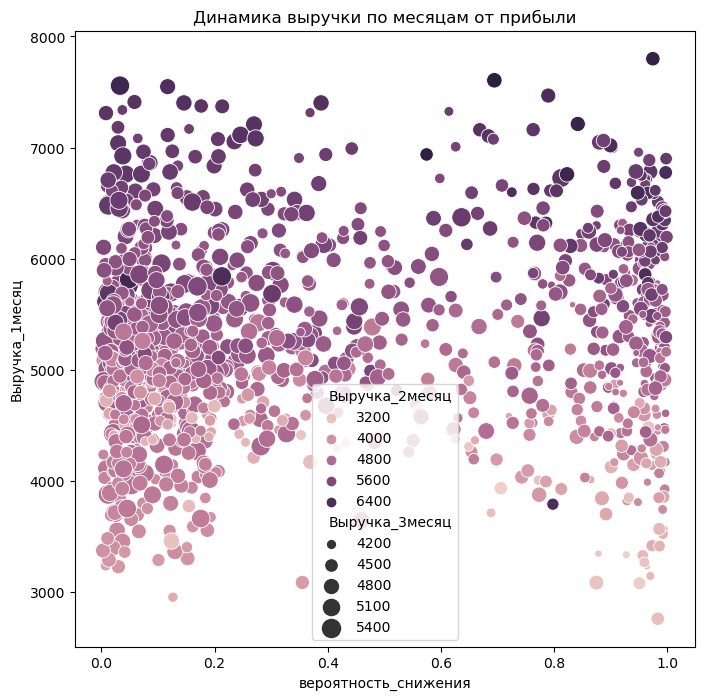

In [119]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(
    data=df_merged,
    x="вероятность_снижения",
    y="Выручка_1месяц",
    hue='Выручка_2месяц',
    size='Выручка_3месяц',
    sizes=(20, 200)
)
plt.title('Динамика выручки по месяцам от прибыли')
plt.show()

Из графика видно, что с каждым месяцем выручка снижается.

P.S. у меня не получилось адекватно построить сводную таблицу, хотя сам график тоже не удеален.

Рассмотрим популярные категории с высокой вероятностью снижения активности

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


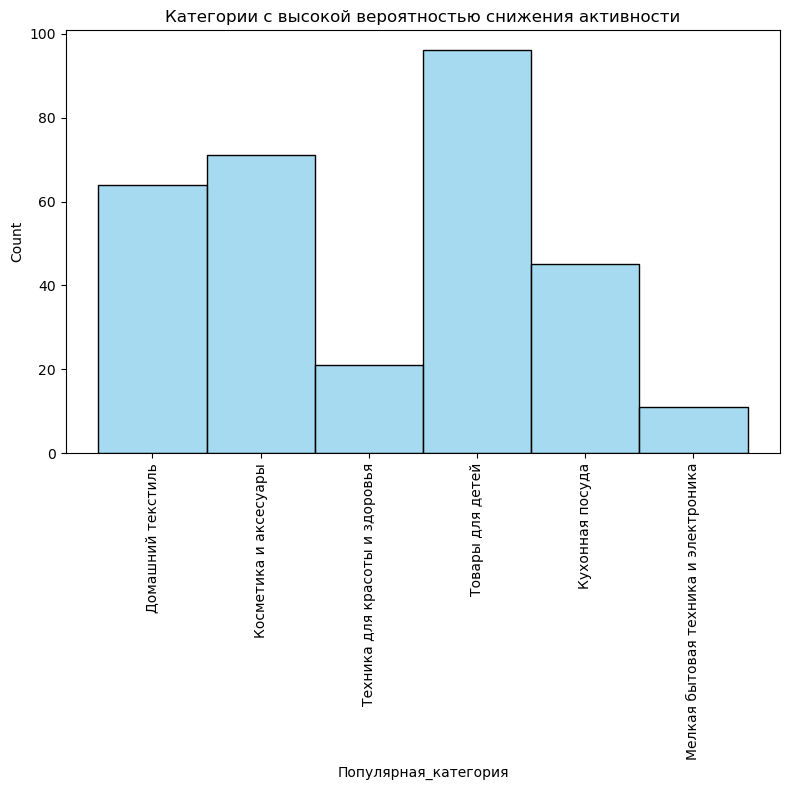

In [120]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Популярная_категория", color="skyblue")
axs[0, 0].set_title("Популярная_категория")
plt.xticks(rotation=90)
plt.title("Категории с высокой вероятностью снижения активности")
plt.tight_layout() 
plt.show()

Верояность снижения покупак имеет категория товаров для детей. Наверно это логично, т.к. дети растут достаточно быстро, и покупки потребность в товарах меняется.

По убыванию идут две категории" Косметика и аксесуары и домашний текстиль, вероятнее всего такие покупки делают мамы с детьми. 

Рассмострим так же сколько времени тратиться на покупку товара в категории.

In [121]:
pivot_table_df = high_probability_df.pivot_table(values='Длительность', index='Популярная_категория', aggfunc='sum').reset_index()
pivot_table_df.columns = ['Популярная_категория', 'Сумма_Длительности']
pivot_table_df = pivot_table_df.sort_values(by='Сумма_Длительности', ascending=False)
print(pivot_table_df)

                   Популярная_категория  Сумма_Длительности
5                      Товары для детей               59602
1                 Косметика и аксесуары               43791
0                     Домашний текстиль               38557
2                       Кухонная посуда               29073
4        Техника для красоты и здоровья               13152
3  Мелкая бытовая техника и электроника                6721


Аналогично категориям тратиться времени на их покупки. ~~Еще одно подтвержение того что покупки делают мамы с детьми.~~

~~__Мои предложения по увеличению прибыли от покупок:__ переработь карточки с товароми для детей, чтобы можно было быстрее найти нужный товар, делать более персональные предложения для покупателей, и учитывать рост детей т.е. предлогать товары для следующей возростной группы. Так может освободится время на следующие покупки.~~

Рассмотрим количества страниц за визит у пользователей с высокой вероятностью снижения активности

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


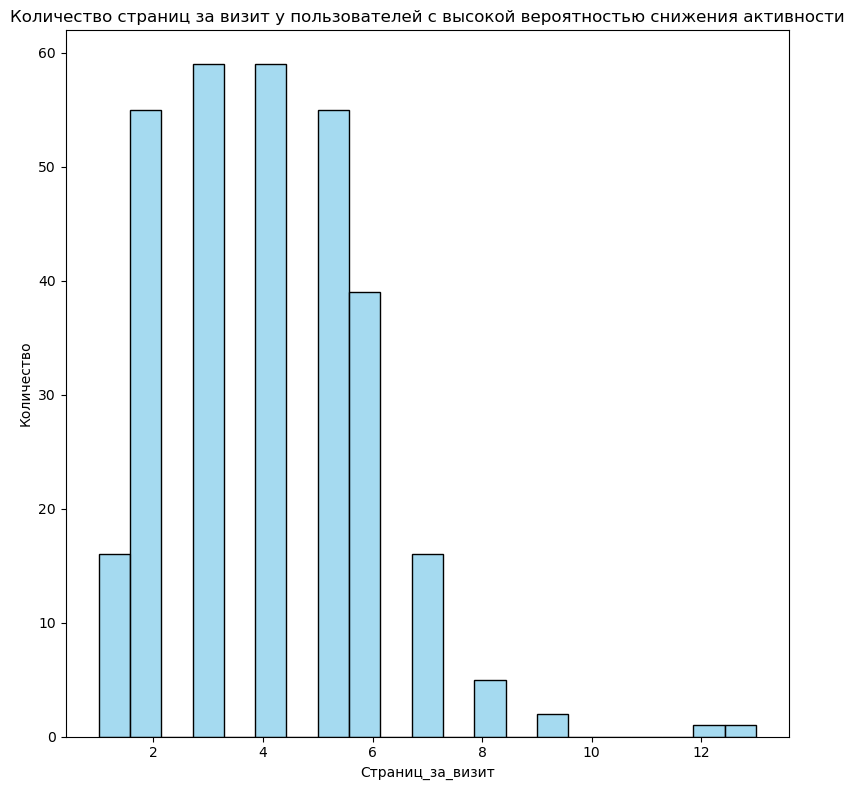

In [122]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Страниц_за_визит", color="skyblue")

plt.title("Количество страниц за визит у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Страниц_за_визит')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

От 1 до 5 посещенных страниц за визит преобладает у выбранной категории

Рассмотрим среднее количество просмотров категорий товаров за визит у пользователей с высокой вероятностью снижения активности

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


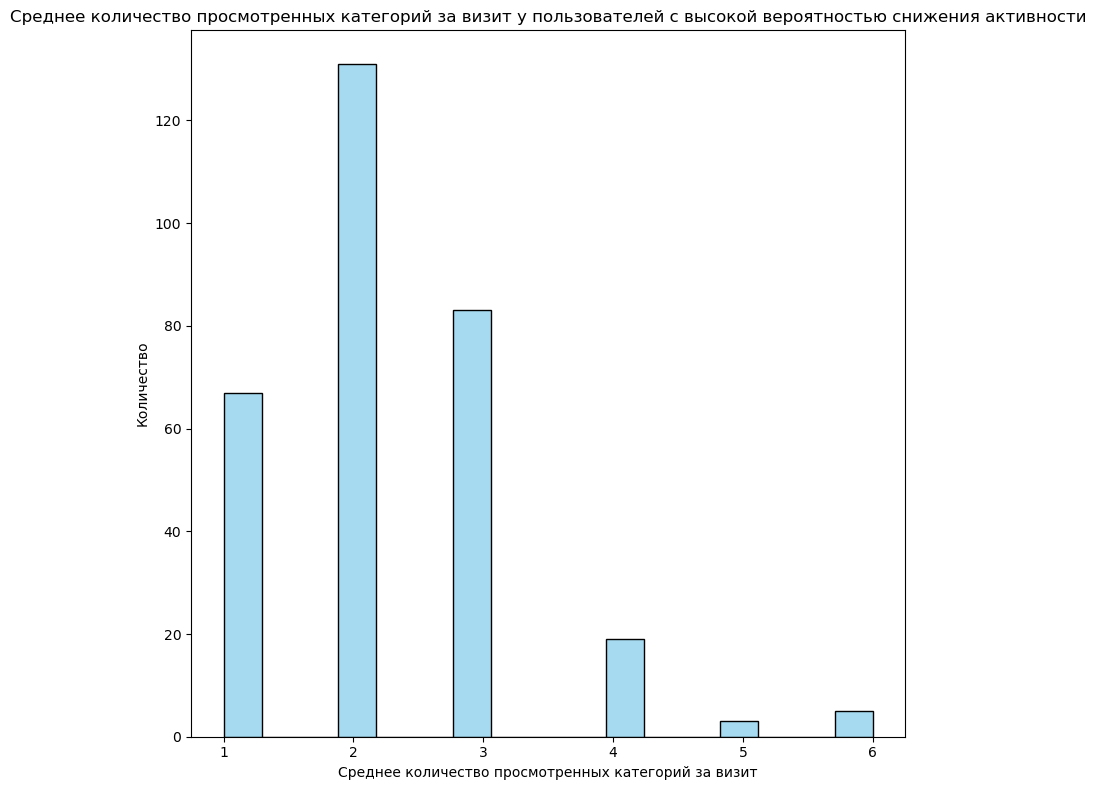

In [123]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Средний_просмотр_категорий_за_визит", color="skyblue")

plt.title("Среднее количество просмотренных категорий за визит у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Среднее количество просмотренных категорий за визит')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

Получается мало категорий просматривает у выбранного сегмента

Рассмотрим Маркетинговую активность за 6 месяцев у выбранного сегмента

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


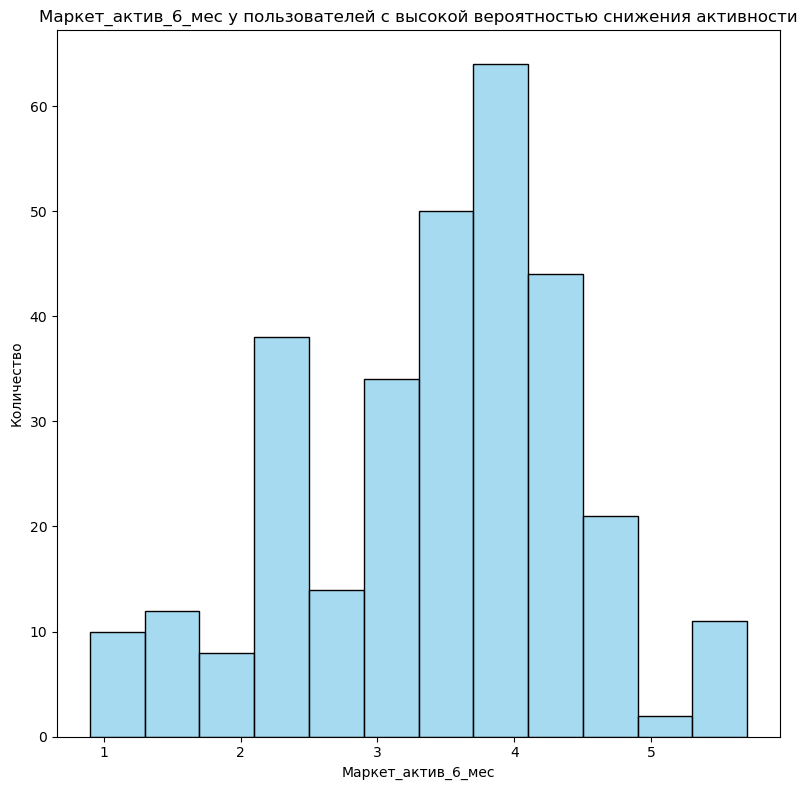

In [124]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Маркет_актив_6_мес", color="skyblue")

#plt.xticks(rotation=90)
plt.title("Маркет_актив_6_мес у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Маркет_актив_6_мес')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

После 4-го месяца идет снижение маркетинговой активности

Рассмотрим Маркетинговую активность текущего месяца за 6 месяцев у выбранного сегмента

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


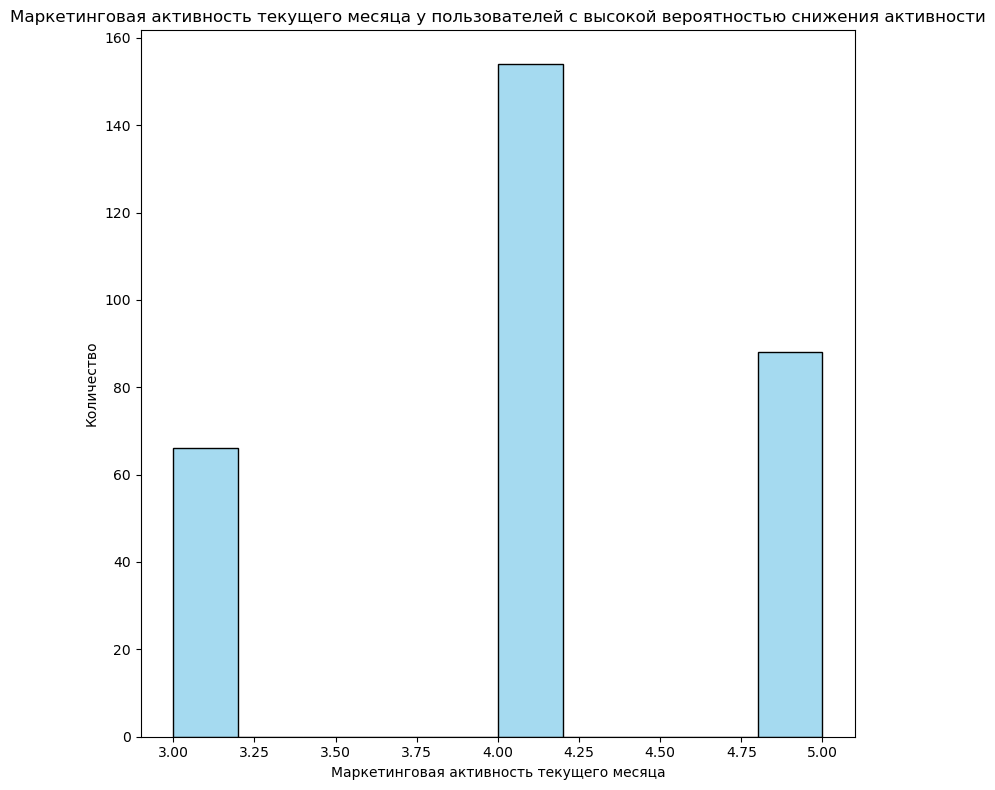

In [125]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Маркет_актив_тек_мес", color="skyblue")

#plt.xticks(rotation=90)
plt.title("Маркетинговая активность текущего месяца у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Маркетинговая активность текущего месяца')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

Не могу сделать однозначный выводов по меркетинговой активности текущего месяца у выбранного сегмента

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


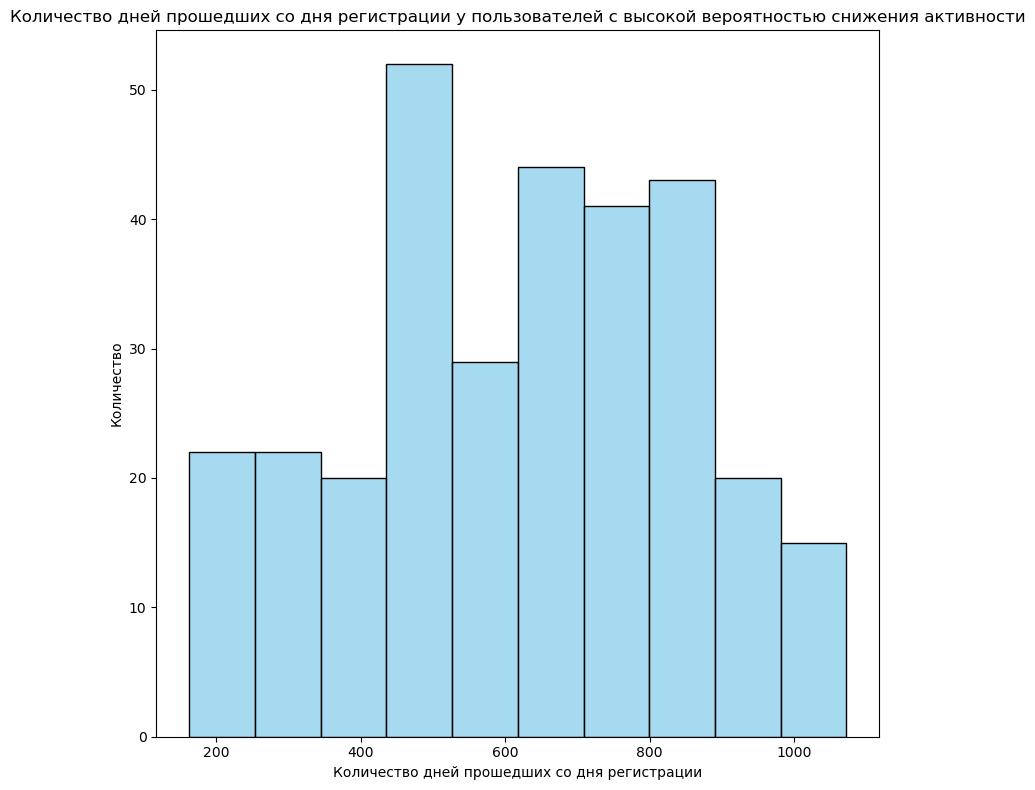

In [126]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Длительность", color="skyblue")

#plt.xticks(rotation=90)
plt.title("Количество дней прошедших со дня регистрации у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Количество дней прошедших со дня регистрации')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

Тут особо ничего интересного

Рассмотрим неоплаченные продукты за квартал

C:\Users\bik-s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


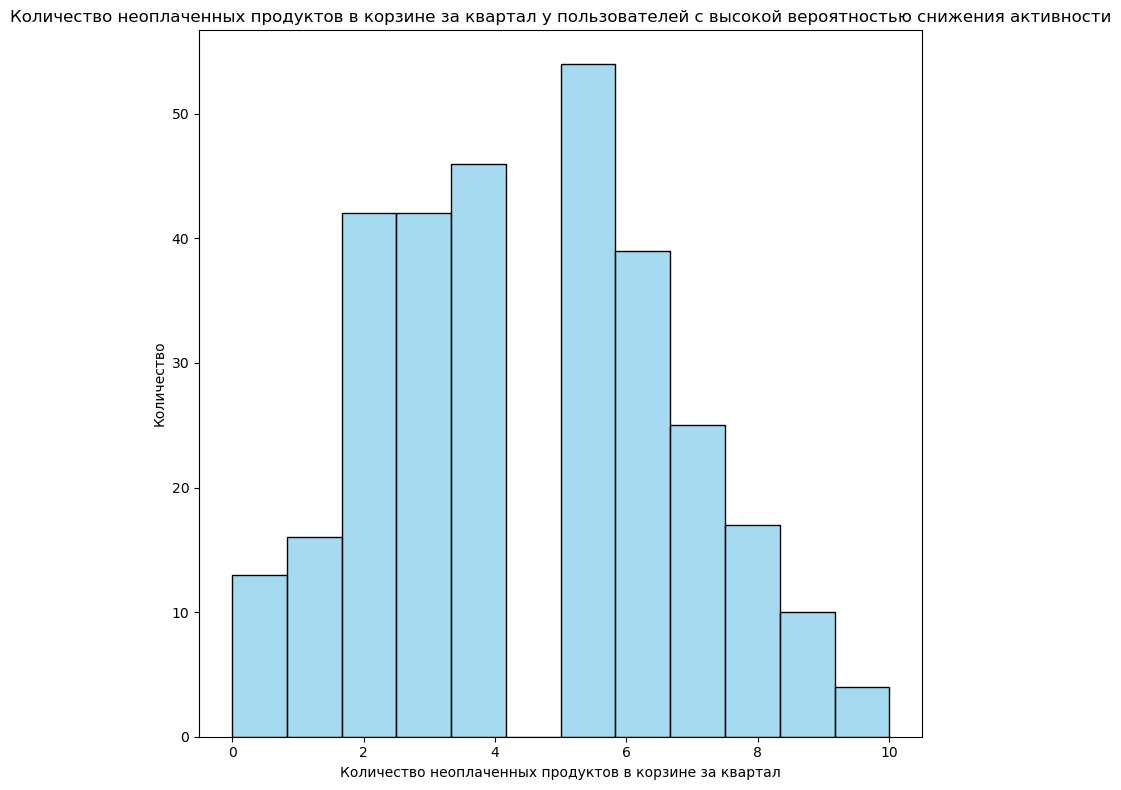

In [127]:
plt.figure(figsize=(8, 8))
sns.histplot(data=high_probability_df, x="Неоплаченные_продукты_штук_квартал", color="skyblue")

#plt.xticks(rotation=90)
plt.title("Количество неоплаченных продуктов в корзине за квартал у пользователей с высокой вероятностью снижения активности")
plt.xlabel('Количество неоплаченных продуктов в корзине за квартал')
plt.ylabel('Количество')
plt.tight_layout() 
plt.show()

Отдельно смотря на количество неоплаченных продуктов в корзине за квартал у выбранного сегмента, сложно сделать вывод.

__Общий портрет покупателя с большой вероятностью снижения активности:__ пользователь в среднем относительно давно зарегистрирован на сайте, за последние 6 месяцев получает мало маркетинговой активности, посещает мало страниц за визит, смотрит мало категорий за визит, достаточно много неоплаченных товаров в корзине, самая актуальная категория покупой товары для детей.

__Предложения для такого покупателя:__ нужно сконцентрироваться на главной странице сайта, там отображать категории товаров для конкретного покупателя. Нужно чтобы были товары с больной скидкой. Чтобы покупатель быстро выбрал нужный товар с большой скидкой и купил его.

# 9.  Общий вывод

__Что было сделано:__

1) Были загруженны данные четырех датафреймов;

2) Выполнена предобработка данных:

- Выявлены дубликаты в датафрейме "market_money" и удалены, пропусков не обнаружено;

- Выявлены и устранены дубликаты в кагориальных данных в датафреймах: "market_file" и "market_money";

- Выявлен и удален выбрас в датафрейме "market_money";

- Выявлена и устранена проблема с типом данных в датафрейме "money".

3) Проведен исследовательский анализ данных:

- Время проведенное на сайте за прошлый и текущий месяц не изменилось, в целом время проведенное на сайте имеет нормальное распределение;

- Выручка в текущем месяце составила 6 802 586 , а за предыдущий 12 681 278, выроучка уменьшилась в 1,86 раза;

- Пользовательская активность не изменилась у 802 человек и 1300, или почти у 60% аудитории.

4) Объеденены таблицы:

- Объеденино три таблицу в одну;

- Добавлены отдельные столбцы для каждого периода.


5) Выполнен корреляционный анализ:

- Целевым признаком является "Покупательская активность", с ним коррелируют следующие данные: "Маркет_актив6мес", "Акционные_покупки", "Средний_просмотр_категорий_за_визит", "Неоплаченные_продукты_штук_квартал", "Страниц_за_визит", "Выручка_3месяц", "минут_предыдцщий_месяц", "минут_текущий_месяц".

6) С использованием пайплан обучены четыре модели и выбрана лучшая:

- Лучшая модель LogisticRegression с гиперпаратметрами C=1, penalty='l1', random_state=42, solver='liblinear';

- Метрика 'roc_auc' лучшей модели на тестовой выборке: 0,92 и F1-score 0,89. Показатели хорошие, модель очень хорошо справляется с прогнозом.

7) Проведен анализ важности признаков:

- Построены графики важности признаков модели с помощью метода SHAP;

- Определены самые и менее важные признаки для модели;

8) Проведена сегментация пользователей:

- Проведена сегментация вероятности снижения активности на высокую и низкую для популярных категорий покупок;

- Проанализирована высокая вероятность снижения активности (больше 0,8);

- Сделан общий портрет покупателя с большой вероятностью снижения активности: пользователь в среднем относительно давно зарегистрирован на сайте, за последние 6 месяцев получает мало маркетинговой активности, посещает мало страниц за визит, смотрит мало категорий за визит, достаточно много неоплаченных товаров в корзине, самая актуальная категория покупой товары для детей.

- Сделано предложения для такого покупателя: нужно сконцентрироваться на главной странице сайта, там отображать категории товаров для конкретного покупателя. Нужно чтобы были товары с больной скидкой. Чтобы покупатель быстро выбрал нужный товар с большой скидкой и купил его
